### Student Information
Name: Yi Jen Lin 林宜蓁

Student ID: 110006261

GitHub ID: yjenlin

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__.

In [234]:
!pip install pandas
!pip install numpy
!pip install nltk
!pip install matplotlib==3.7.3
!pip install plotly
!pip install seaborn
!pip install PAMI
!pip install umap-learn

In [235]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [236]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)
#This command also shuffles the data randomly, but with random_state we can bring the same distribution of data everytime
#if we choose the same number, in this case "42". This is good for us, it means we can reproduce the same results every time
#we want to run the code.

twenty_train.data[0:2]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

### **>>> Exercise 1 (Watch Video):**  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [237]:
for text in twenty_train.data[:3]:
    print(text)

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv

In [238]:
import os

from google.colab import drive
drive.mount('/content/drive')
#import from google drive as on colab

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [239]:
!cp /content/drive/MyDrive/Colab_Notebooks/datamininglab1/data_mining_helpers.py /content

In [240]:
import pandas as pd

# my functions
import data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### **>>> Exercise 2 (take home):**

In [241]:
X_filtered = X.groupby('category').sample(n=3, replace=True)
X_filtered

text  category  \
317   From: richard@harlqn.co.uk (Richard Brooksby) ...         0   
1765  From: william.vaughan@uuserv.cc.utah.edu (WILL...         0   
1732  From: bobbe@vice.ICO.TEK.COM (Robert Beauchain...         0   
1279  From: louis@loa.citilille.fr (Louis Gonzalez 2...         1   
902   From: jr0930@eve.albany.edu (REGAN JAMES P) Su...         1   
1715  From: johne@iti.gov.sg (Dr. John S. Eickemeyer...         1   
294   From: km@cs.pitt.edu (Ken Mitchum) Subject: Re...         2   
1142  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
297   From: nyeda@cnsvax.uwec.edu (David Nye) Subjec...         2   
1721  From: hedrick@cs.rutgers.edu Subject: Re: Doin...         3   
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
2156  From: bohja@cnsvax.uwec.edu Subject: WITCHES A...         3   

               category_name  
317              alt.atheism  
1765             alt.atheism  
1732             alt.atheism  
1279           comp.graphics  
902            comp.graphics  
1715           comp.graphics  
294                  sci.med  
1142                 sci.med  
297                  sci.med  
1721  soc.religion.christian  
2     soc.religion.christian  
2156  soc.religion.christian

### **>>> Exercise 3 (Watch Video):**

In [242]:
Xa = X.iloc[::10]
Xa[:5]

text  category  \
0   From: sd345@city.ac.uk (Michael Collier) Subje...         1   
10  From: anasaz!karl@anasazi.com (Karl Dussik) Su...         3   
20  From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...         3   
30  From: vgwlu@dunsell.calgary.chevron.com (greg ...         2   
40  From: david-s@hsr.no (David A. Sjoen) Subject:...         3   

             category_name  
0            comp.graphics  
10  soc.religion.christian  
20  soc.religion.christian  
30                 sci.med  
40  soc.religion.christian

### >>> **Exercise 4 (Watch Video):**

In [243]:
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

### >>> **Exercise 5 (take home)**

In [244]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [245]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

The .isnull() function only detects NaN values and Pythons None, which are considered missing value in the data. In NA_df, the missing_example column contains values such as the string 'NaN', string 'None', or just an empty string '', but the .isnull() function does not consider these as missing values. They are regular strings, meaning the .isnull() function does not recognize them as missing. To detect these cases, the strings would need to convert these values to NaN or handle them separately.

### 5.1 Sampling

In [246]:
X_sample = X.sample(n=1000) #random state

### >>> Exercise 6 (take home):

The row indicies between X and X_sample are different, since sample is taking random rows within the dataset to compile into the table, whilst the X dataframe has its indicies in order, from 0 - n. The "category_name" column shows the human-readable name of each category. In both images, categories like soc.religion.christian, sci.med, and comp.graphics are present, but the specific rows and category names differ between the two images. Both tables have the same structure (with columns text, category, and category_name), but they show different subsets of data, with different row indices and corresponding text/category combinations.

In [247]:
import matplotlib.pyplot as plt
%matplotlib inline

### >>> **Exercise 7 (Watch Video):**

<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

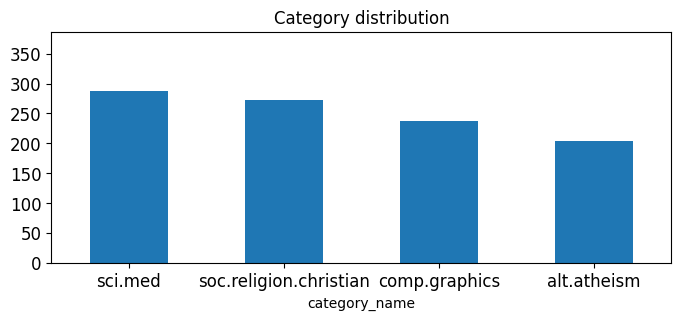

In [248]:
# Answer here
Xsample = X_sample.category_name.value_counts()
y_max = Xsample.max() + 100

X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, y_max],
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 8 (take home):**

<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

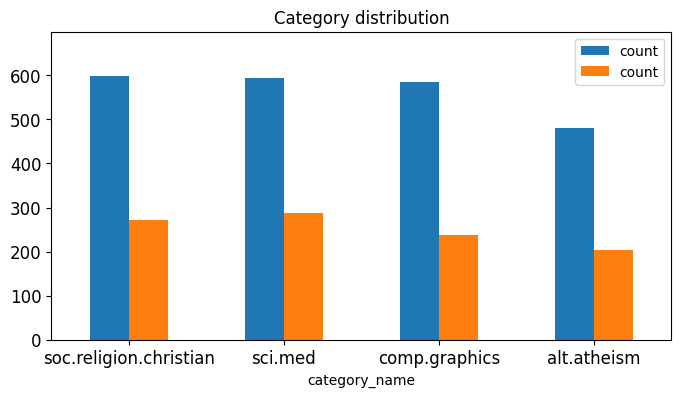

In [249]:
# Answer here

Xnorm = X.category_name.value_counts()
X_sample_norm = X_sample.category_name.value_counts()

#concatenate the two together
X_total = pd.concat([Xnorm, X_sample_norm], axis=1)

#dynamic code for ylim
y_max = Xnorm.max() + 100

#print(y_max)

X_total.plot(kind = 'bar',
             title = 'Category distribution',
             ylim = [0, y_max],
             rot = 0, fontsize = 12, figsize = (8,4))

In [250]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [251]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [252]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  (0, 20253)	1
  (0, 587)	1
  (0, 12051)	1
  (0, 5201)	1
  :	:
  (0, 25361)	1
  (0, 25337)	1
  (0, 12833)	2
  (0, 5195)	1
  (0, 27836)	1
  (0, 18474)	1
  (0, 32270)	1
  (0, 9932)	1
  (0, 15837)	1
  (0, 32135)	1
  (0, 17556)	1
  (0, 4378)	1
  (0, 26175)	1
  (0, 9338)	1
  (0, 33572)	1
  (0, 31915)	1
  (0, 177)	2
  (0, 2326)	2
  (0, 3062)	1
  (0, 35416)	1
  (0, 20459)	1
  (0, 14085)	1
  (0, 3166)	1
  (0, 12541)	1
  (0, 230)	1


In [253]:
analyze = count_vect.build_analyzer()

### **>>> Exercise 9 (Watch Video):**

In [254]:
# How do we turn our array[0] text document into a tokenized text using the build_analyzer()?
analyze(X.text[0])

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

### **>>> Exercise 10 (take home):**

In [255]:
for row in range(5):
  for col in range(100):
    if X_counts[row, col] != 0:
      print(count_vect.get_feature_names_out()[col])

00
01


### **>>> Exercise 11 (take home):**

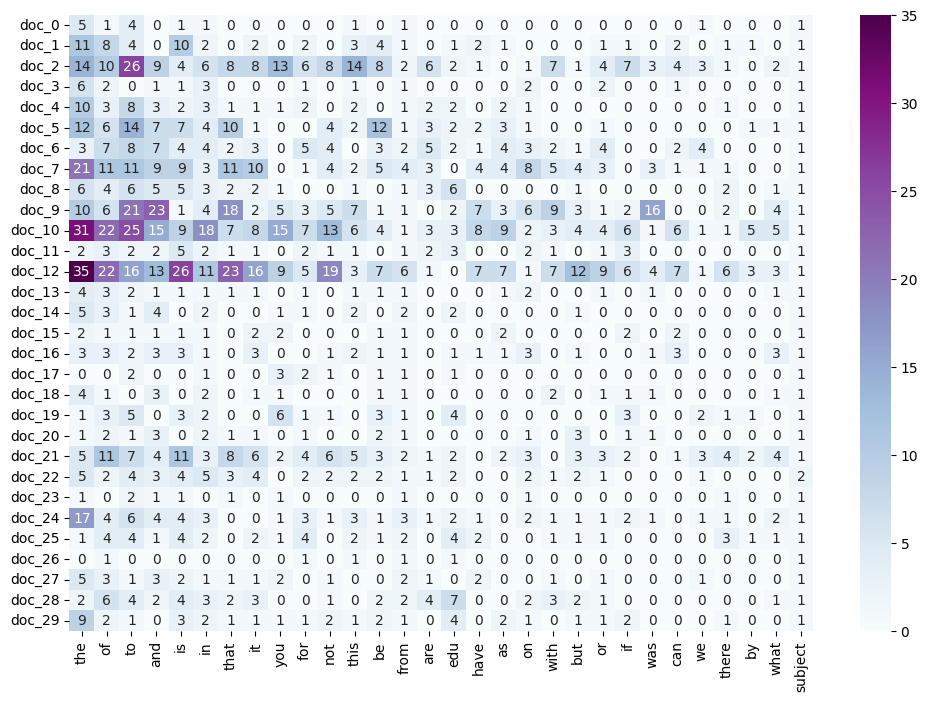

In [281]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#without removing (words less than 5 letters) words
n_top_terms = 30
term_frequencies = np.asarray(X_counts.sum(axis=0)).flatten()
top_n_term_indices = term_frequencies.argsort()[-n_top_terms:][::-1]
X_top_terms = X_counts[:, top_n_term_indices].toarray()
top_terms = [count_vect.get_feature_names_out()[i] for i in top_n_term_indices]

n_docs = 30
plot_y = ["doc_" + str(i) for i in list(X.index)[:n_docs]]
X_top_terms_sampled = X_top_terms[:n_docs, :]
df_todraw = pd.DataFrame(X_top_terms_sampled, columns=top_terms, index=plot_y)
plt.subplots(figsize=(12, 8))
ax = sns.heatmap(df_todraw,
                 cmap="BuPu",
                 vmin=0, vmax=np.max(X_top_terms_sampled), annot=True)

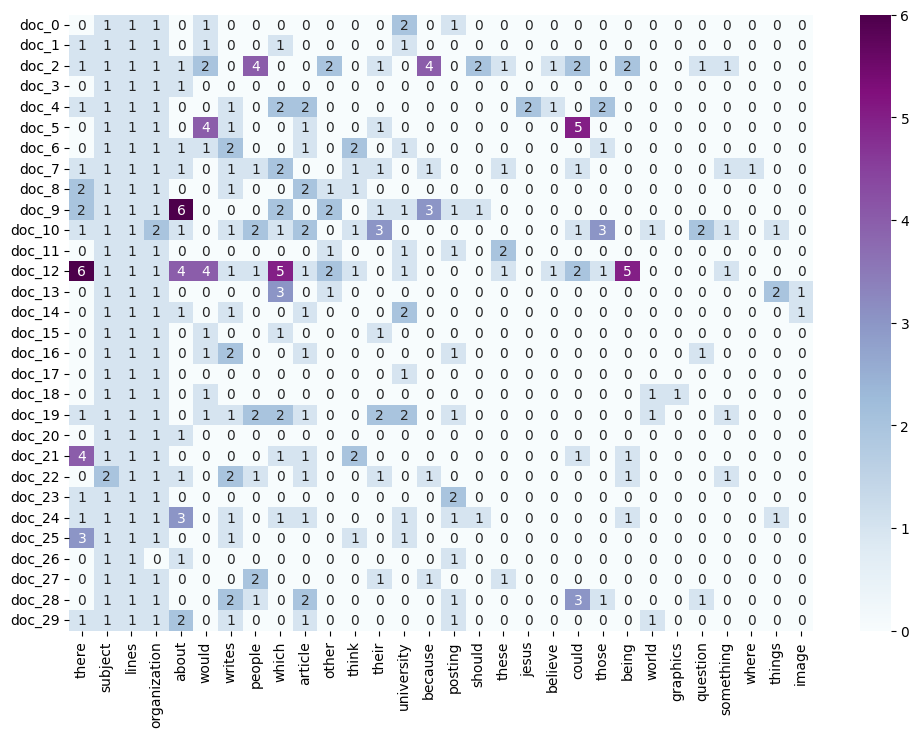

In [282]:
# Set the number of top terms to extract
n_top_terms = 30

# Set the number of top terms to extract
n_top_terms = 30

# Compute term frequencies from the existing `X_counts`
term_frequencies = np.asarray(X_counts.sum(axis=0)).flatten()

# Get the feature names and filter out words with fewer than 5 letters
feature_names = count_vect.get_feature_names_out()
filtered_indices = [i for i, term in enumerate(feature_names) if len(term) >= 5]

# Recompute term frequencies and top terms excluding short words
filtered_term_frequencies = term_frequencies[filtered_indices]
top_n_term_indices = np.argsort(filtered_term_frequencies)[-n_top_terms:][::-1]
X_top_terms = X_counts[:, filtered_indices][:, top_n_term_indices].toarray()
top_terms = [feature_names[filtered_indices[i]] for i in top_n_term_indices]

# Set the number of documents to visualize
n_docs = 30
plot_y = ["doc_" + str(i) for i in list(X.index)[:n_docs]]
X_top_terms_sampled = X_top_terms[:n_docs, :]

# Create a DataFrame for visualization
df_todraw = pd.DataFrame(X_top_terms_sampled, columns=top_terms, index=plot_y)

# Plot the heatmap
plt.subplots(figsize=(12, 8))
ax = sns.heatmap(df_todraw,
                 cmap="BuPu",
                 vmin=0, vmax=np.max(X_top_terms_sampled), annot=True)
plt.show()

### >>> **Exercise 12 (take home):**

In [283]:
# Answer here
import plotly.express as px

# Get term frequencies and terms from the vectorizer
term_frequencies = np.asarray(X_counts.sum(axis=0)).flatten()
terms = count_vect.get_feature_names_out()


# Filter terms based on the threshold
filtered_indices = [i for i, freq in enumerate(term_frequencies)]
filtered_terms = [terms[i] for i in filtered_indices]
filtered_frequencies = [term_frequencies[i] for i in filtered_indices]

# Limit to the top N terms that pass the frequency threshold
top_n = 300
top_terms = filtered_terms[:top_n]
top_frequencies = filtered_frequencies[:top_n]

# Plot the filtered terms and their frequencies
fig = px.bar(x=top_terms, y=top_frequencies,
             labels={'x': 'Terms', 'y': 'Term Frequencies'},
             title=f"Top {top_n} Term Frequencies",
             color=top_terms,
             color_discrete_sequence=px.colors.qualitative.Plotly)
fig.update_layout(xaxis_tickfont=dict(size=2),
                  yaxis_tickfont=dict(size=10),
                  xaxis_tickangle=-90, width=2200, height=800)
fig.show()


### >>> **Exercise 13 (take home):**

In [284]:
# Answer here
import plotly.express as px

# Get term frequencies and terms from the vectorizer
term_frequencies = np.asarray(X_counts.sum(axis=0)).flatten()
terms = count_vect.get_feature_names_out()

# Define frequency threshold
frequency_threshold = 10

# Filter terms based on the threshold
filtered_indices = [i for i, freq in enumerate(term_frequencies) if freq >= frequency_threshold]
filtered_terms = [terms[i] for i in filtered_indices]
filtered_frequencies = [term_frequencies[i] for i in filtered_indices]

# Limit to the top N terms that pass the frequency threshold
top_n = 100
top_terms = filtered_terms[:top_n]
top_frequencies = filtered_frequencies[:top_n]

# Plot the filtered terms and their frequencies
fig = px.bar(x=top_terms, y=top_frequencies,
             labels={'x': 'Terms', 'y': 'Term Frequencies'},
             title=f"Top {top_n} Term Frequencies (Threshold: {frequency_threshold})",
             color=top_terms,
             color_discrete_sequence=px.colors.qualitative.Plotly)
fig.update_layout(xaxis_tickfont=dict(size=2),
                  yaxis_tickfont=dict(size=10),
                  xaxis_tickangle=-90, width=2200, height=800)
fig.show()


### >>> **Exercise 14 (take home):**

In [285]:
# Answer here
import plotly.express as px

# Get term frequencies and terms from the vectorizer
term_frequencies = np.asarray(X_counts.sum(axis=0)).flatten()
terms = count_vect.get_feature_names_out()

# Define frequency threshold
frequency_threshold = 10

# Filter terms based on the threshold
filtered_indices = [i for i, freq in enumerate(term_frequencies) if freq >= frequency_threshold]
filtered_terms = [terms[i] for i in filtered_indices]
filtered_frequencies = [term_frequencies[i] for i in filtered_indices]

# Sort terms and frequencies in descending order of frequency
sorted_indices = np.argsort(filtered_frequencies)[::-1]
sorted_terms = [filtered_terms[i] for i in sorted_indices]
sorted_frequencies = [filtered_frequencies[i] for i in sorted_indices]

# Limit to the top N terms that pass the frequency threshold
top_n = 100
top_terms = sorted_terms[:top_n]
top_frequencies = sorted_frequencies[:top_n]

# Plot the filtered terms and their frequencies
fig = px.bar(x=top_terms, y=top_frequencies,
             labels={'x': 'Terms', 'y': 'Term Frequencies'},
             title=f"Top {top_n} Term Frequencies (Threshold: {frequency_threshold}) - Long Tail",
             color=top_terms,
             color_discrete_sequence=px.colors.qualitative.Plotly)
fig.update_layout(xaxis_tickfont=dict(size=2),
                  yaxis_tickfont=dict(size=10),
                  xaxis_tickangle=-90, width=2200, height=800)
fig.show()



In [261]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

<ipython-input-262-95b72ce9758d>:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



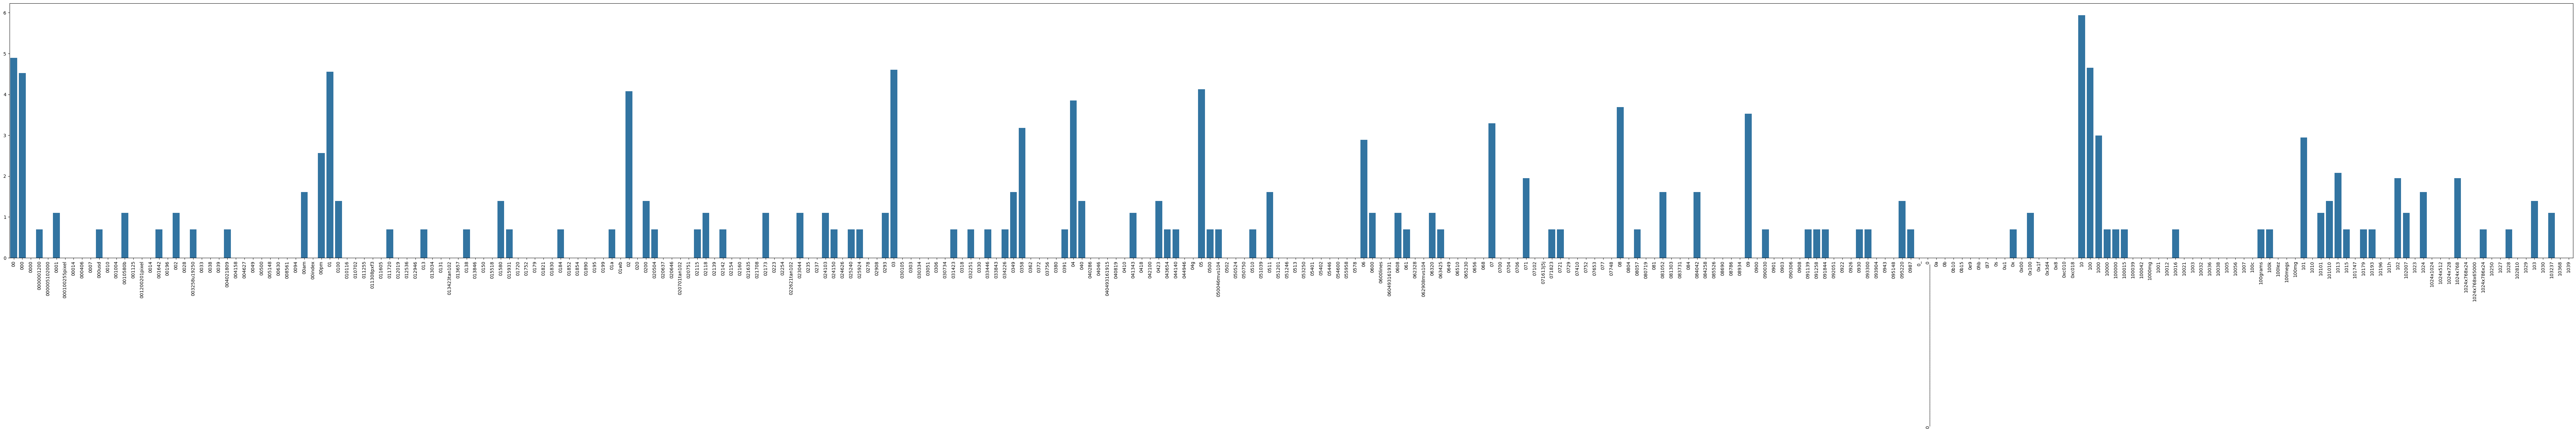

In [262]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### >>> **Exercise 15 (take home):**

<ipython-input-263-63452d36d76f>:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



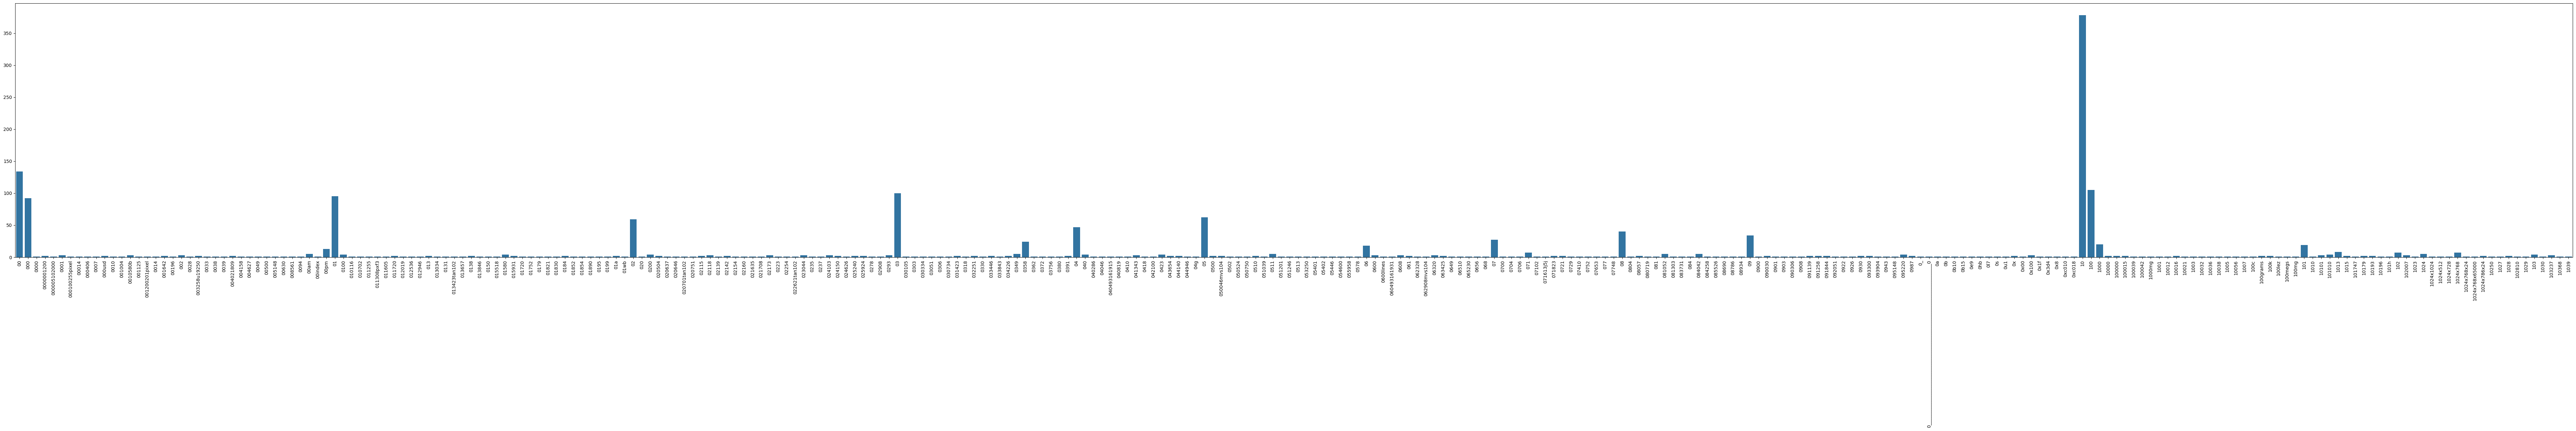

In [263]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

term_frequencies vs. term_frequencies_log

From comparing the two results, it could be seen that the term_frequencies_log bar graph, in comparison to the term_frequencies, its values in the bars of words only appearing once or twice in a document, can be seen much more clearly in graph of term_frequencies_log. A logarithmic scale for term frequencies compresses the range and makes high and low frequencies more comparable, making less frequent terms more visible. This adjustment brings to light the typical long tail that is characteristic of language data, where few terms are extremely frequent, but most of them are rare, allowing you to see a broader range in vocabulary.

In [264]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = X['category_name'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['category_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts

    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()

    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)

    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [265]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)

    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()

    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)

    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]



For category comp.graphics we filter the following words:
Bottom 1.0% words: 
initworld    1
jkpg         1
jiu1         1
jiu          1
jfreund      1
            ..
lab2         1
laaksone     1
l4v          1
l300         1
l14h11       1
Length: 137, dtype: int64
Top 5.0% words: 
40               27
distributed      27
open             27
multi            27
getting          27
               ... 
is             1751
and            2382
of             2470
to             2775
the            4537
Length: 687, dtype: int64

For category soc.religion.christian we filter the following words:
Bottom 1.0% words: 
disparate       1
expose          1
explosive       1
resisting       1
exploitation    1
               ..
fence           1
feminist        1
remarriage      1
remarried       1
remeber         1
Length: 138, dtype: int64
Top 5.0% words: 
pagan        36
claims       36
gave         36
parts        36
jr           37
          ...  
that       4393
and        4409
to        

000  000005102000  000100255pixel  0007  000usd  0010580b  \
0      0             0               0     0       0         0   
1      0             0               0     0       0         0   
2      0             0               0     0       0         0   
3      0             0               0     0       0         0   
4      0             0               0     0       0         0   
..   ...           ...             ...   ...     ...       ...   
579    0             0               0     0       0         0   
580    0             0               0     0       0         0   
581    0             0               0     0       0         0   
582    0             0               0     0       0         0   
583    0             0               0     0       0         0   

     001200201pixel  00196  002  0028  ...  zorn  zrz  zsoft  zt  zug  zurich  \
0                 0      0    0     0  ...     0    0      0   0    0       0   
1                 0      0    0     0  ...     0    0      0   0    0       0   
2                 0      0    0     0  ...     0    0      0   0    0       0   
3                 0      0    0     0  ...     0    0      0   0    0       0   
4                 0      0    0     0  ...     0    0      0   0    0       0   
..              ...    ...  ...   ...  ...   ...  ...    ...  ..  ...     ...   
579               0      0    0     0  ...     0    0      0   0    0       0   
580               0      0    0     0  ...     0    0      0   0    0       0   
581               0      0    0     0  ...     0    0      0   0    0       0   
582               0      0    0     0  ...     0    0      0   0    0       0   
583               0      0    0     0  ...     0    0      0   0    0       0   

     zvi  zyeh  zyxel  ªl  
0      0     0      0   0  
1      0     0      0   0  
2      0     0      0   0  
3      0     0      0   0  
4      0     0      0   0  
..   ...   ...    ...  ..  
579    0     0      0   0  
580    0     0      0   0  
581    0     0      0   0  
582    0     0      0   0  
583    0     0      0   0  

[584 rows x 12932 columns]

### >>> **Exercise 16 (take home):**

For this filtering method, it is very efficient as from what is shown above, it can be seen that many unintelligible words that have been filtered out from each category, which would make the data in each of the categories be more clean. Also a lot of the repeated words, such as stop words and website names that do not help with the data at all were also deleted, which is better because too many repeated words would make the data messy, and doing this makes the data cleaner. The only flaw in this though is that some words that are very relative of the categories, such as "toxic" and "genetic" in sci.med are deleted in the top 5%, which I believe might be useful in the data, are deleted. Overall, I believe that this filtering methods are good for deleting stop words and unintelligible words that do not contribute to the data, as the bottom 1% are mostly unitelligible words, and the top 5% is mostly repeated stop words, making it able to deal will two different types of words unimportant to the data, however, the only bad similarity is that if there are no more of either, relevant words to the categories would start getting deleted, which might affect the data.

In [266]:
from PAMI.extras.convert.DF2DB import DF2DB

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')

    # Create the DenseFormatDF object and convert to a transactional database
    #obj = db.DenseFormatDF(term_document_dfs[category]) #Uncomment this line and comment the line below if this block of code
                                                         #gives you trouble
    obj = DF2DB(term_document_dfs[category])

    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

In [267]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_sci_med.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame()

Frequent patterns were generated successfully using frequentPatternGrowth algorithm


In [268]:
obj1.save('freq_patterns_sci_med_minSup9.txt')

In [269]:
obj2 = alg.FPGrowth(iFile='td_freq_db_alt_atheism.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_alt_atheism= obj2.getPatternsAsDataFrame()

Frequent patterns were generated successfully using frequentPatternGrowth algorithm


In [270]:
obj2.save('freq_patterns_alt_atheism_minSup9.txt')

In [271]:
obj3 = alg.FPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_comp_graphics= obj3.getPatternsAsDataFrame()

Frequent patterns were generated successfully using frequentPatternGrowth algorithm


In [272]:
obj3.save('freq_patterns_comp_graphics_minSup9.txt')

In [273]:
obj4 = alg.FPGrowth(iFile='td_freq_db_soc_religion_christian.csv', minSup=minSup)
obj4.mine()
frequentPatternsDF_soc_religion_christian= obj4.getPatternsAsDataFrame()

Frequent patterns were generated successfully using frequentPatternGrowth algorithm


In [274]:
obj4.save('freq_patterns_soc_religion_minSup9.txt')

In [275]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_sci_med, frequentPatternsDF_soc_religion_christian, frequentPatternsDF_comp_graphics, frequentPatternsDF_alt_atheism]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

                        Patterns  Support
19911                        gov       33
19912                  institute       33
57158                    snm6394       32
19910                       form       31
57156                    deleted       30
...                          ...      ...
54045  axes funds motss matching        9
54044   boy funds motss matching        9
54043    boy axes motss matching        9
54042    et funds motss matching        9
0                          swell        9

[57159 rows x 2 columns]
Number of patterns discarded: 2304


In [276]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  0000  0000001200  000005102000  0001  000100255pixel  00014  \
0      0    0     0           0             0     0               0      0   
1      0    0     0           0             0     0               0      0   
2      0    0     0           0             0     0               0      0   
3      0    0     0           0             0     0               0      0   
4      1    0     0           0             0     0               0      0   
...   ..  ...   ...         ...           ...   ...             ...    ...   
2252   0    0     0           0             0     0               0      1   
2253   0    0     0           0             0     0               0      0   
2254   0    0     0           0             0     0               0      0   
2255   0    0     0           0             0     0               0      0   
2256   0    0     0           0             0     0               0      0   

      000406  0007  ...  soc princeton funds motss matching  \
0          0     0  ...                                   0   
1          0     0  ...                                   0   
2          0     0  ...                                   0   
3          0     0  ...                                   0   
4          0     0  ...                                   0   
...      ...   ...  ...                                 ...   
2252       0     0  ...                                   0   
2253       0     0  ...                                   0   
2254       0     0  ...                                   0   
2255       0     0  ...                                   0   
2256       0     0  ...                                   0   

      soc princeton boy motss matching  et axes motss matching  \
0                                    0                       0   
1                                    0                       0   
2                                    0                       0   
3                                    0                       0   
4                                    0                       0   
...                                ...                     ...   
2252                                 0                       0   
2253                                 0                       0   
2254                                 0                       0   
2255                                 0                       0   
2256                                 0                       0   

      soc princeton et motss matching  soc princeton al motss matching  \
0                                   0                                0   
1                                   0                                0   
2                                   0                                0   
3                                   0                                0   
4                                   0                                0   
...                               ...                              ...   
2252                                0                                0   
2253                                0                                0   
2254                                0                                0   
2255                                0                                0   
2256                                0                                0   

      axes funds motss matching  boy funds motss matching  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         0   
...                         ...                       ...   
2252                          0                         0   
2253                          0                         0   
2254                          0                         0   
2255                

### >>> **Exercise 17 (take home):**

In [277]:
# Answer Here
import pandas as pd
from PAMI.frequentPattern.topk import FAE as alg

# Define function to run FAE Top-K algorithm for a given k value
def run_fae_topk(k, file_path):
    fae = alg.FAE(iFile=file_path, k=k)
    fae.mine()

    # Get the patterns and runtime
    patterns_df = fae.getPatternsAsDataFrame()
    run_time = fae.getRuntime()

    print(f"\nResults for k={k}:")
    print(f"Total number of Frequent Patterns: {len(patterns_df)}")
    print(f"Execution Time: {run_time} seconds")
    print(patterns_df)
    return patterns_df, run_time

# File path and k values
file_path = r'/content/drive/MyDrive/Colab_Notebooks/datamininglab1/td_freq_db_comp_graphics.csv'
k_values = [500, 1000, 1500]

# Run algorithm for each k value and store results
results = {k: run_fae_topk(k, file_path) for k in k_values}

 TopK frequent patterns were successfully generated using FAE algorithm.

Results for k=500:
Total number of Frequent Patterns: 500
Execution Time: 2.3202691078186035 seconds
                                              Patterns  Support
0                                                maybe       26
1                                                 life       24
2                                                ideas       24
3                                                 feel       24
4                                                tried       24
..                                                 ...      ...
495  awful posts curious concerning proposed learn ...       12
496  posts curious concerning proposed learn forum ...       12
497  convenience posts curious concerning proposed ...       12
498  posts curious concerning proposed learn forum ...       12
499  posts curious concerning proposed learn forum ...       12

[500 rows x 2 columns]
 TopK frequent patterns were succ

In [278]:
import pandas as pd
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg

# Define function to run MaxFPGrowth algorithm for a given min_support value
def run_maxfpgrowth(min_support, file_path):
    fpg = alg.MaxFPGrowth(file_path, min_support)
    fpg.mine()

    # Retrieve patterns and runtime
    patterns_df = fpg.getPatternsAsDataFrame()
    run_time = fpg.getRuntime()

    # Output results
    print(f"\nResults for min_support={min_support}:")
    print(f"Total Frequent Patterns: {len(patterns_df)}")
    print(f"Execution Time: {run_time} seconds")
    print(patterns_df)

    # Save patterns to a file
    fpg.save(f'fpg_results_{min_support}.txt')

    return patterns_df, run_time

# File path and min_support values
file_path = '/content/drive/MyDrive/Colab_Notebooks/datamininglab1/td_freq_db_comp_graphics.csv'
min_support_values = [3, 6, 9]

# Run algorithm for each min_support and store results in a dictionary
results = {min_support: run_maxfpgrowth(min_support, file_path) for min_support in min_support_values}


Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 

Results for min_support=3:
Total Frequent Patterns: 6872
Execution Time: 36.22966480255127 seconds
                                               Patterns  Support
0     due bytes responsible 000 opinion 640x480 rob ...        3
1                                                  bag         3
2                                          garbo uwasa         3
3             wrong 200 responsible 000 umn 480 640 tc         3
4                                responsible 000 essex         3
...                                                 ...      ...
6867                                    didn wondering         3
6868                             feel wrong personally         3
6869                                     wrong correct         3
6870                                      life correct         3
6871                                        maybe life         4

[6872 rows x 2 columns]
Maximal Fre

### 5.5 Dimensionality Reduction

In [279]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

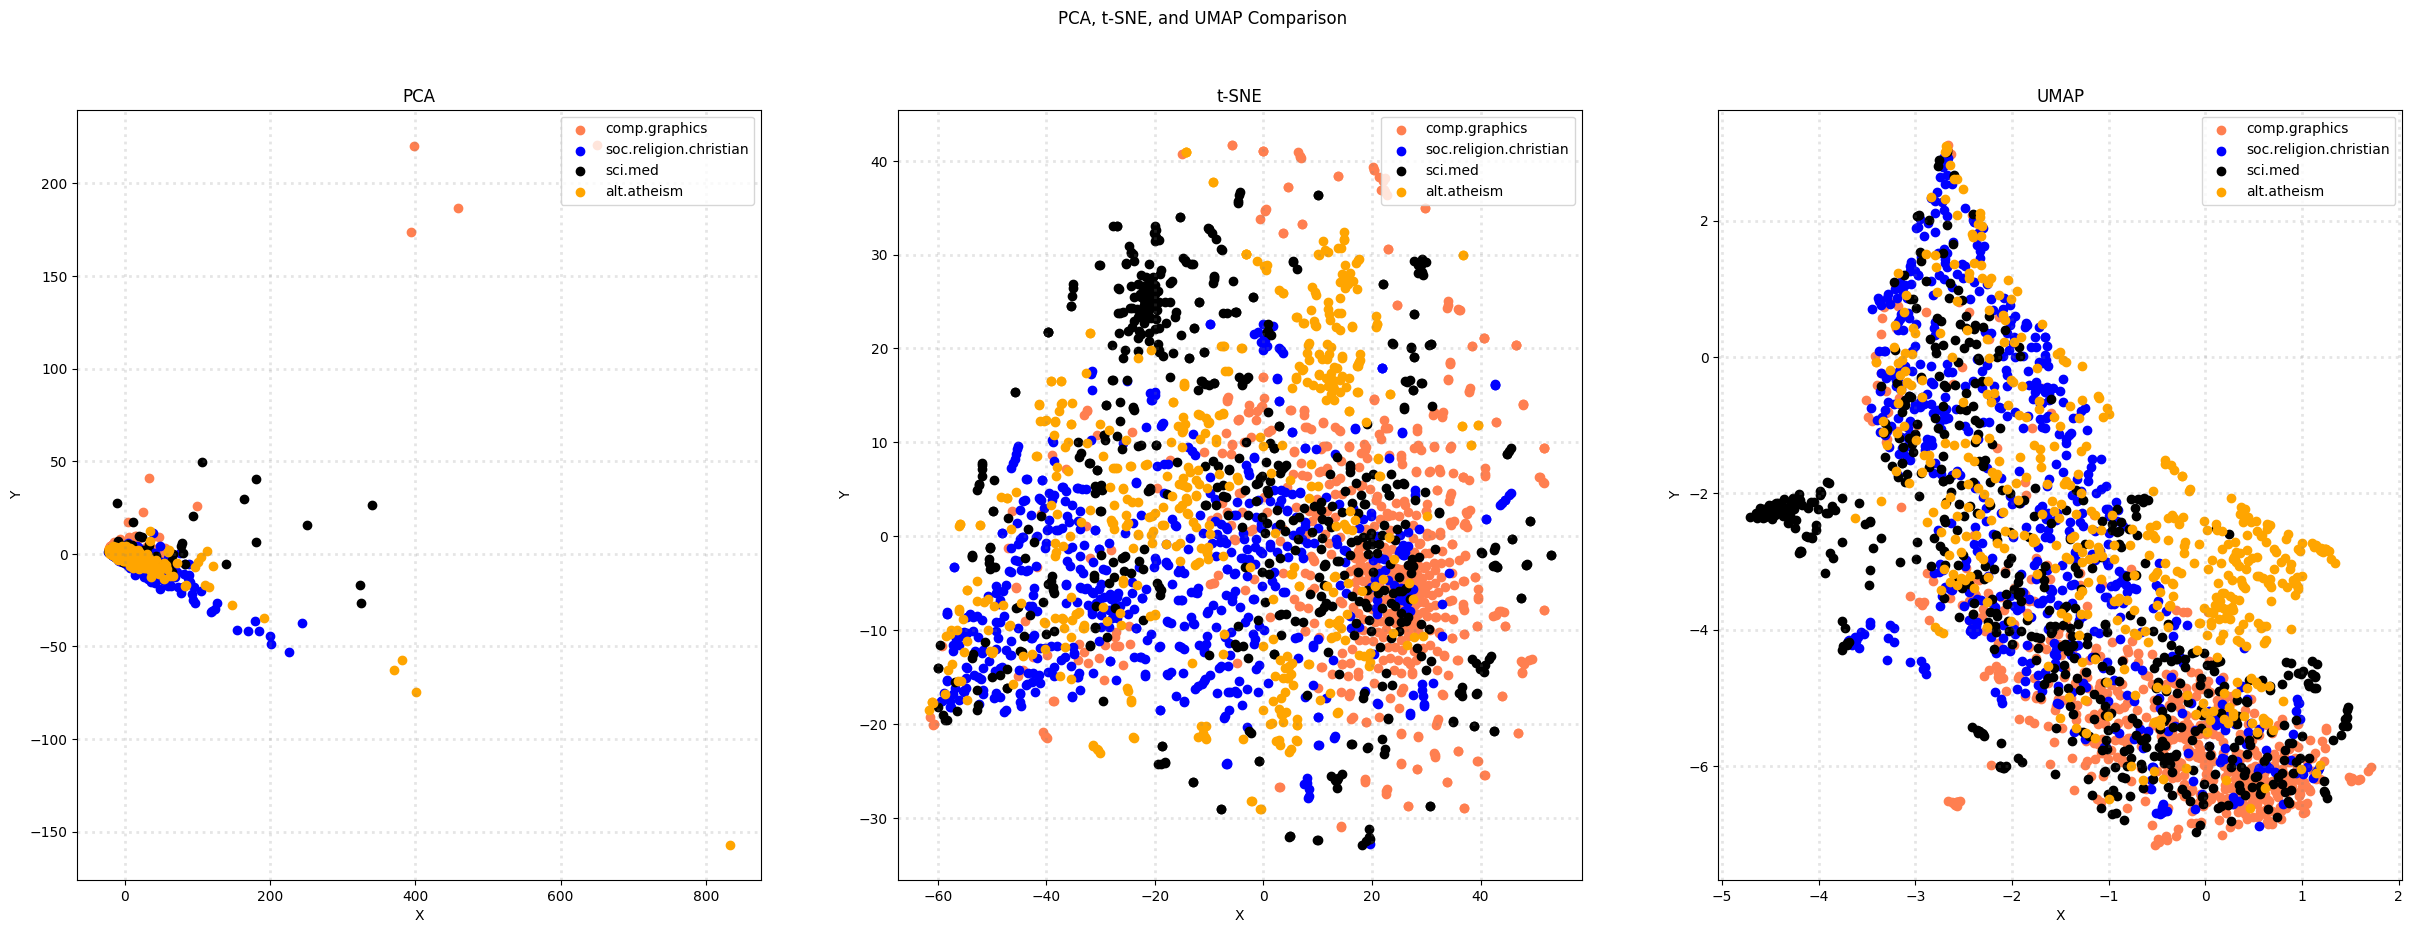

In [280]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [61]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

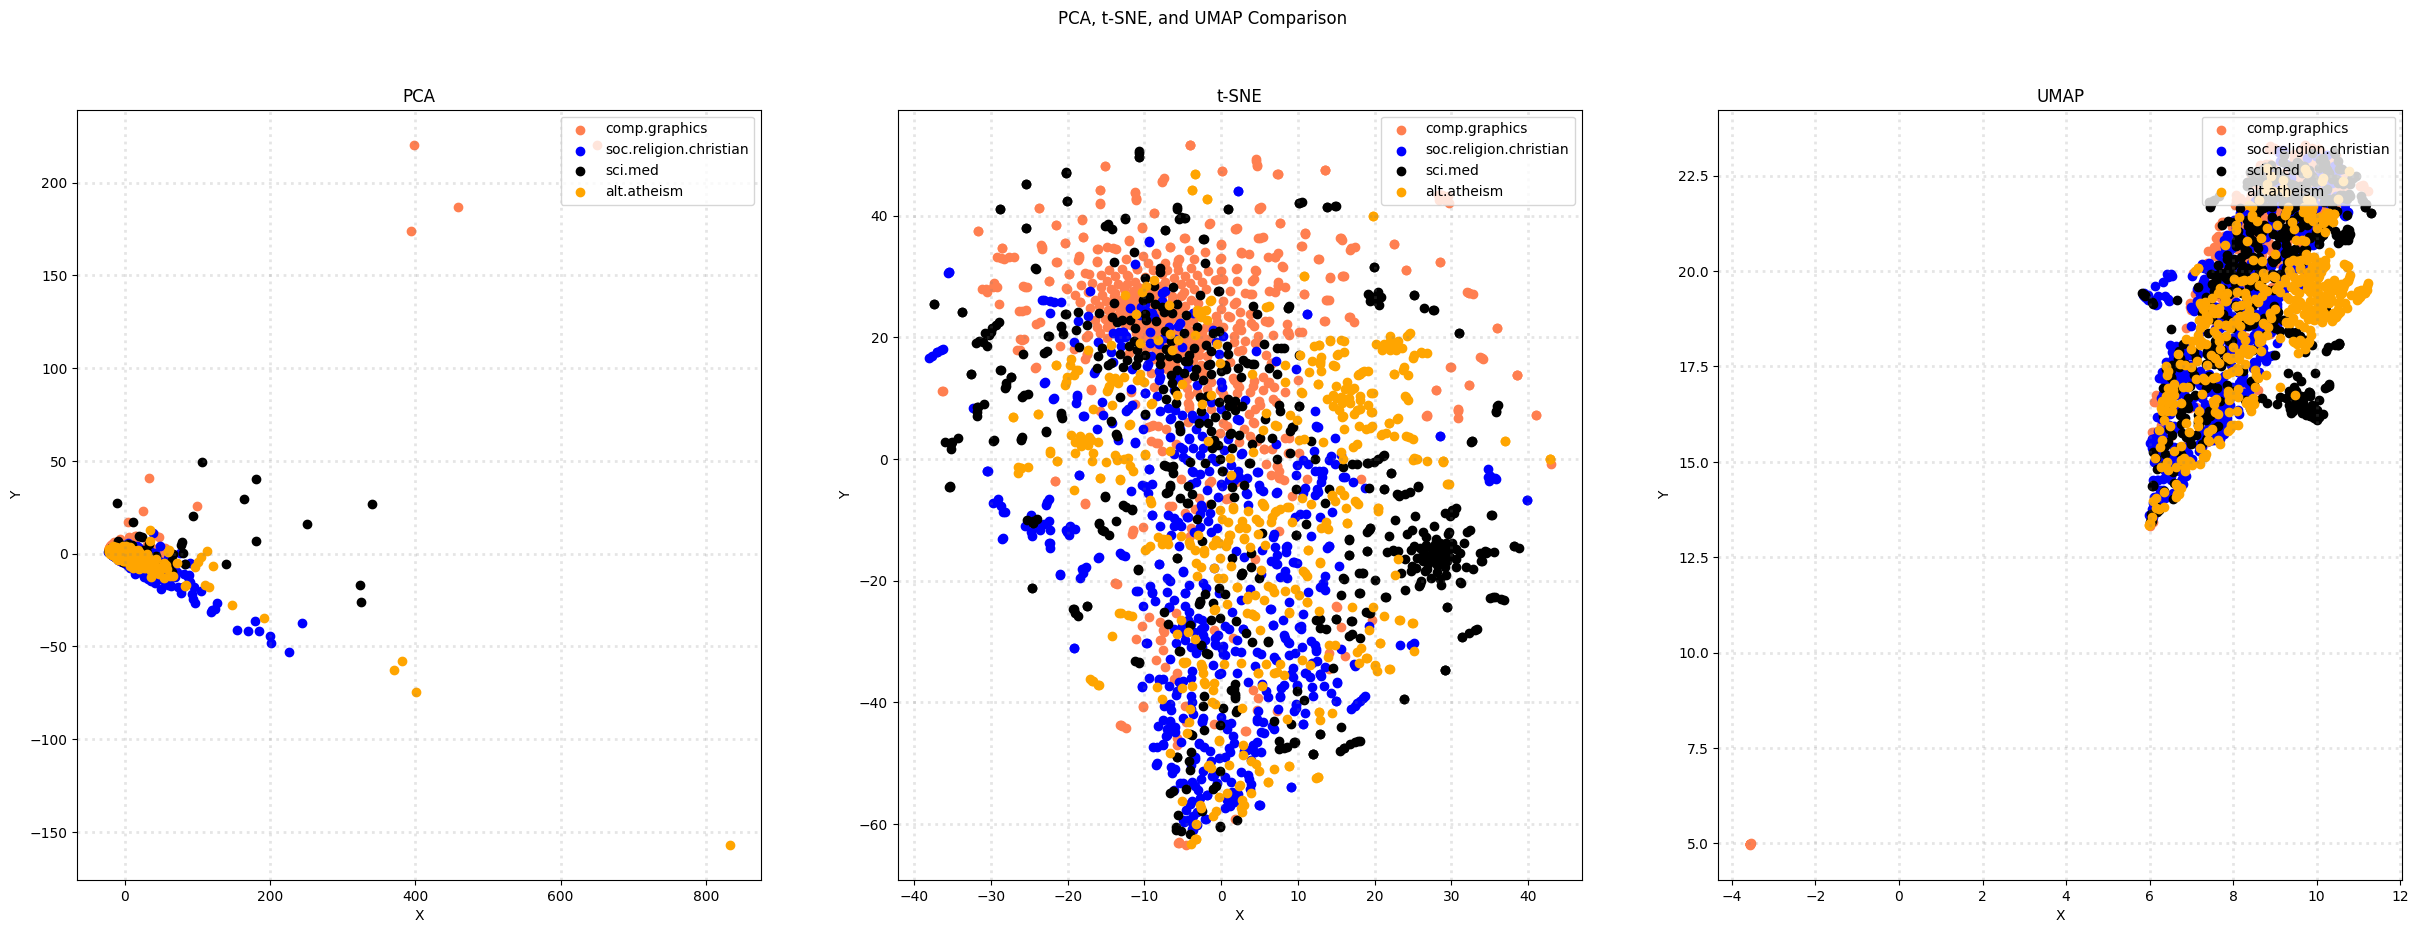

In [62]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

### >>> Exercise 18 (take home):

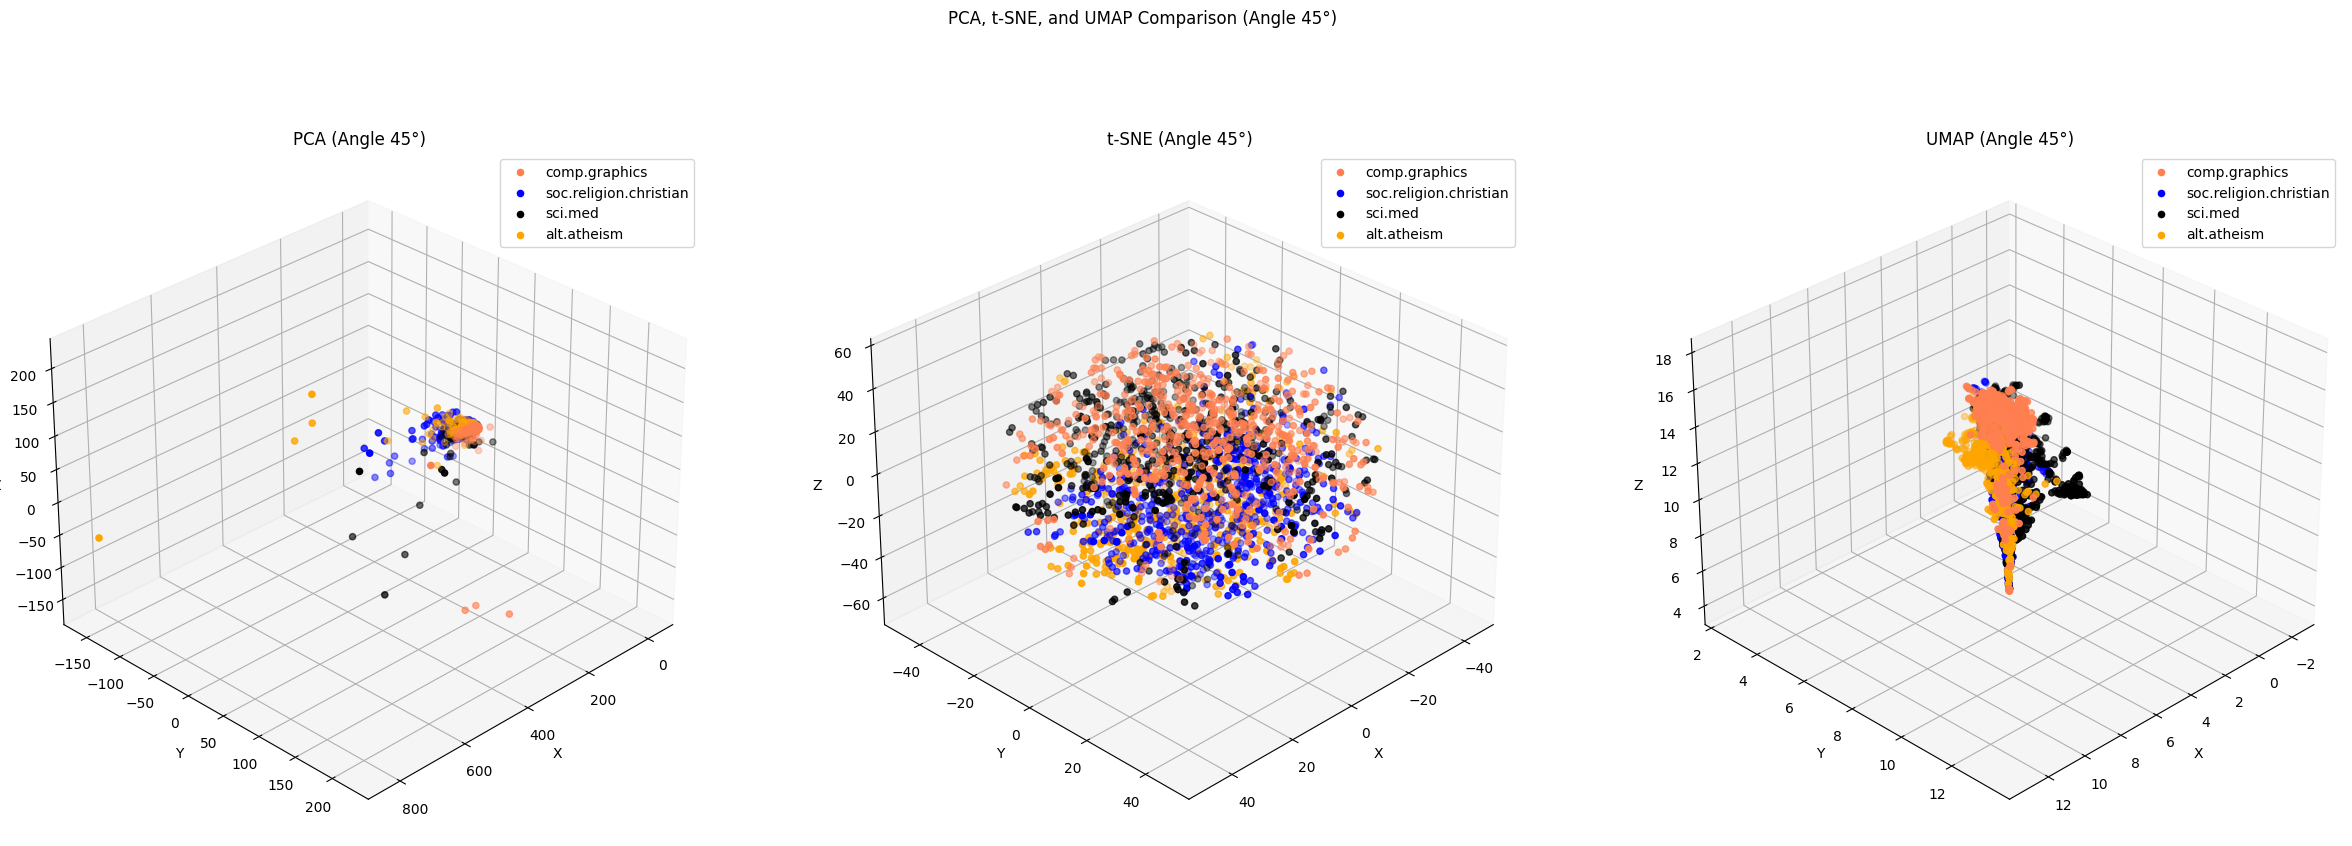

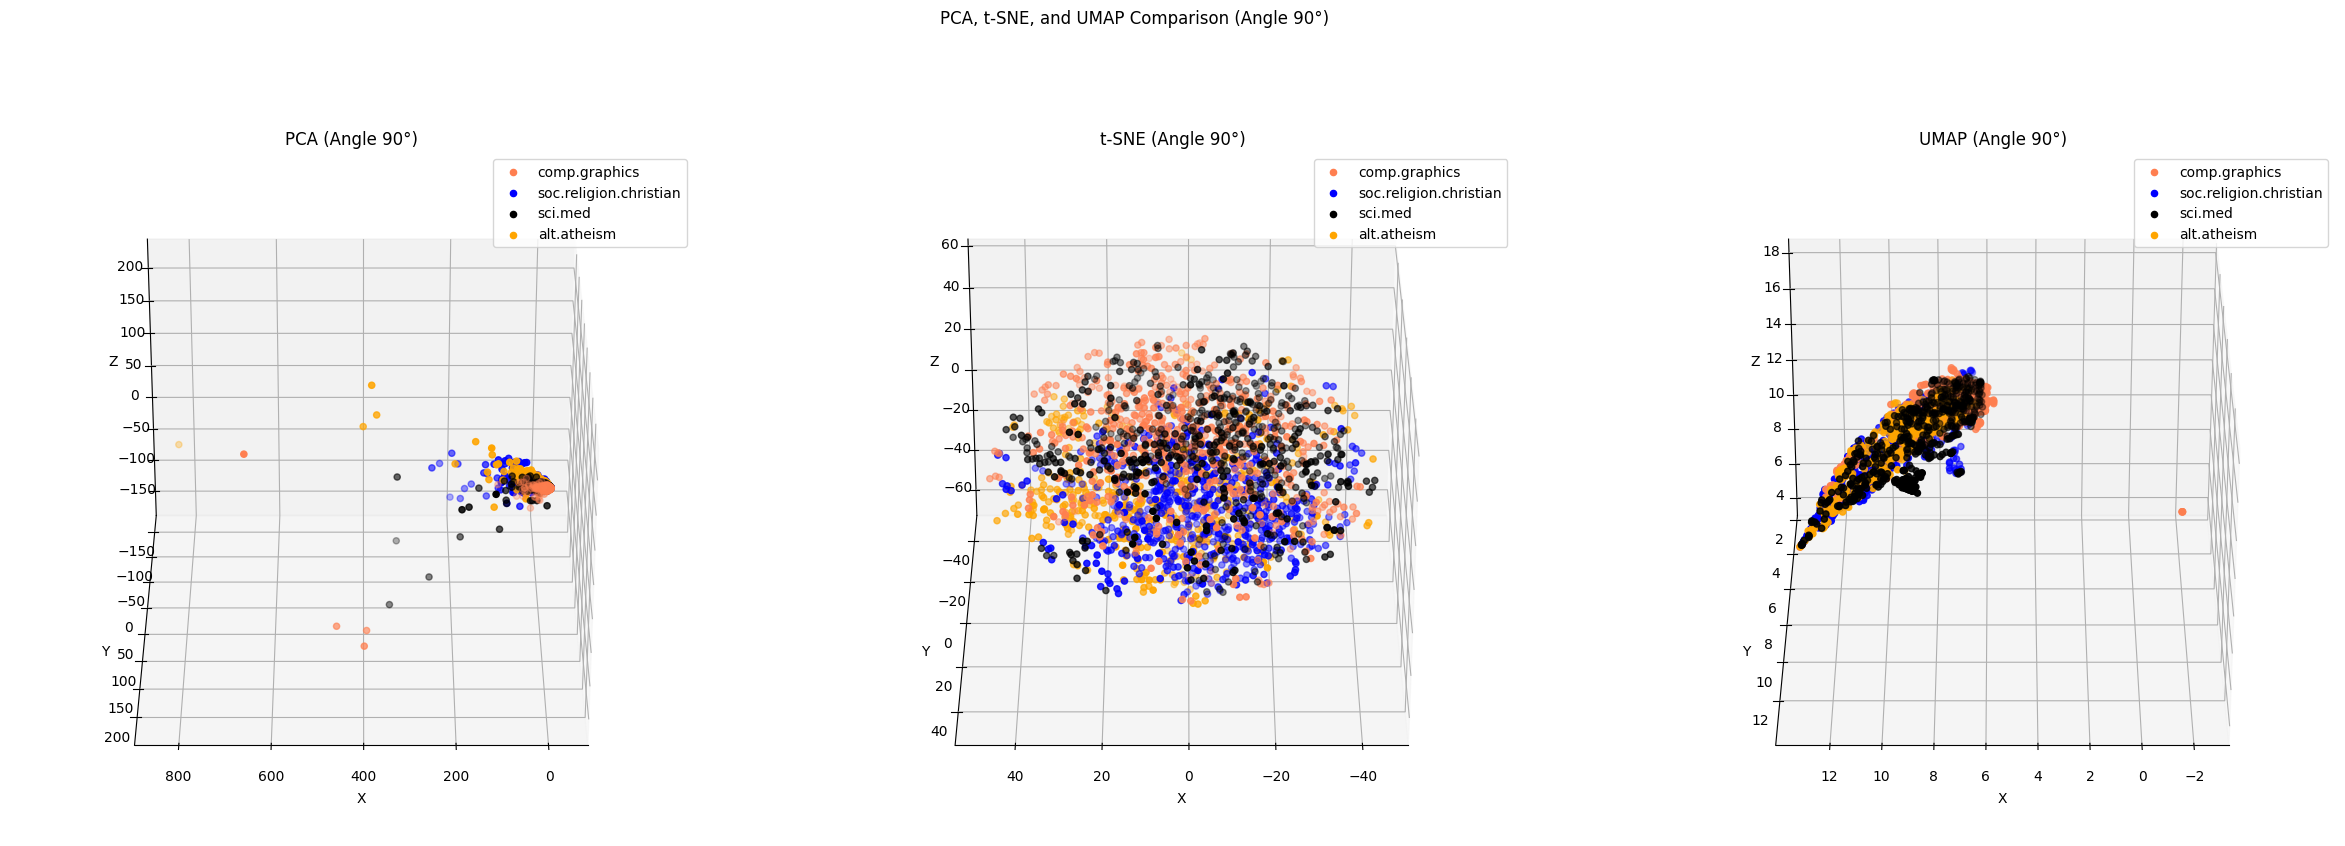

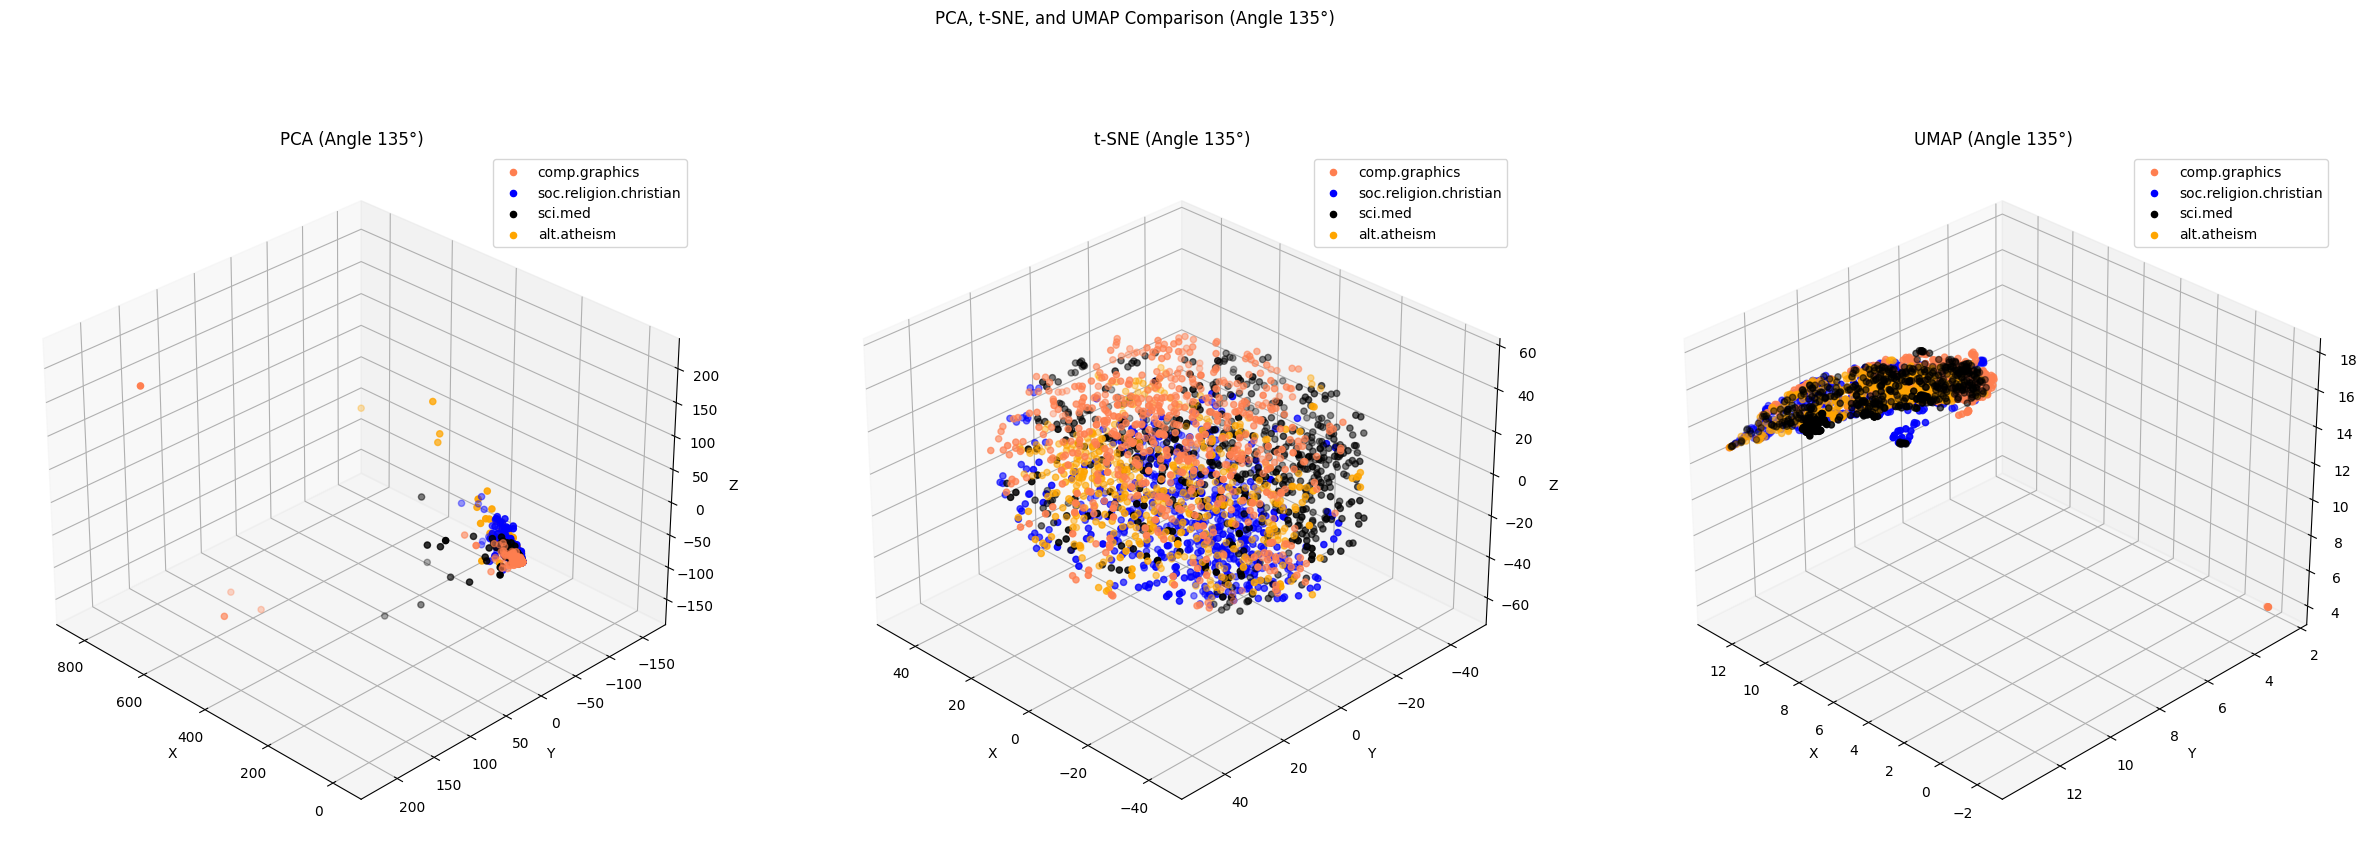

In [63]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap

# Apply 3D dimensionality reduction
X_pca_aug_3d = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug_3d = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug_3d = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

# Define colors and categories for plotting
colors = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique()

# 3D scatter plot function
def scatter_3d_plot(ax, X_reduced, title, angle):
    for color, category in zip(colors, categories):
        mask = X['category_name'] == category
        xs, ys, zs = X_reduced[mask, 0], X_reduced[mask, 1], X_reduced[mask, 2]
        ax.scatter(xs, ys, zs, c=color, label=category, marker='o')

    ax.view_init(30, angle)
    ax.set_title(f"{title} (Angle {angle}°)")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)

# Dictionary of reductions for easier plotting
X_reductions = {
    "PCA": X_pca_aug_3d,
    "t-SNE": X_tsne_aug_3d,
    "UMAP": X_umap_aug_3d
}

# Plot each reduction with specified angles
angles = [45, 90, 135]
for angle in angles:
    fig = plt.figure(figsize=(30, 10))
    fig.suptitle(f'PCA, t-SNE, and UMAP Comparison (Angle {angle}°)')

    for i, (title, X_reduced) in enumerate(X_reductions.items(), 1):
        ax = fig.add_subplot(1, 3, i, projection='3d')
        scatter_3d_plot(ax, X_reduced, title, angle)

    plt.show()

### >>> **Exercise 19 (take home):**

In [64]:
X = X.join(pd.get_dummies(X['category_name'], prefix='category'))
print(X.head())

                                                text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   

                                      tokenized_text  category_alt.atheism  \
0  {PC, group?, 071, advance., Organization:

#Part 2

In [65]:
import pandas as pd

X = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")
X

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



sentiment                                            comment
0     not nostalgia  He was a singer with a golden voice that I lov...
1         nostalgia  The mist beautiful voice ever I listened to hi...
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4         nostalgia  listening to his songs reminds me of my mum wh...
...             ...                                                ...
1495  not nostalgia  i don't know!..but the opening of the video,.....
1496  not nostalgia  it's sad this is such a beautiful song when yo...
1497  not nostalgia  Dear Friend, I think age and time is not that ...
1498      nostalgia  I was born in 1954 and started to be aware of ...
1499      nostalgia  This is the first CD I bought after my marriag...

[1500 rows x 2 columns]

In [71]:
# Shuffle the data with a fixed random state for reproducibility
X = X.sample(frac=1, random_state=42).reset_index(drop=True)

# Create a binary sentiment label
X['sentiment_label'] = (X['sentiment'] == 'nostalgia').astype(int)

# Define split for train and test sets
test_size = 0.2
split_idx = int((1 - test_size) * len(X))

# Split the data into training and testing sets
train_data, test_data = X.iloc[:split_idx], X.iloc[split_idx:]

# Separate features and labels for both train and test sets
X_train, y_train = train_data['comment'], train_data['sentiment_label']
X_test, y_test = test_data['comment'], test_data['sentiment_label']

# Display training and testing set sizes
print(f"Training data size: {X_train.shape[0]}")
print(f"Test data size: {X_test.shape[0]}")

Training data size: 1200
Test data size: 300


Text(0.5, 0, 'Sentiment')

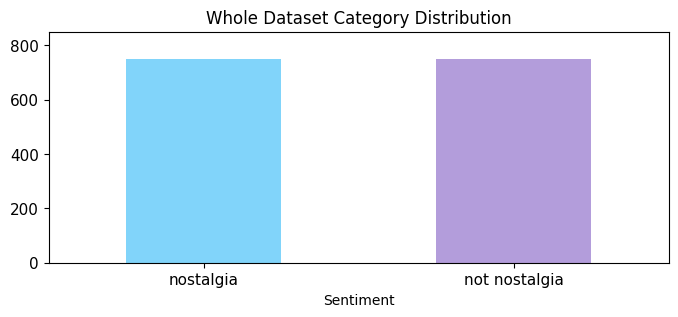

In [78]:
# Calculate sentiment category counts for the bar plot
sentiment_sample = X['sentiment'].value_counts()
y_max = sentiment_sample.max() + 100  # Define upper bound for visualization

# Plot the sentiment distribution
sentiment_sample.plot(kind='bar', title='Whole Dataset Category Distribution',
                      ylim=(0, y_max), color=['#81d4fa', '#b39ddb'], rot = 0,
                      fontsize=11, figsize=(8, 3))
plt.xlabel('Sentiment')



Text(0.5, 0, 'Sentiment')

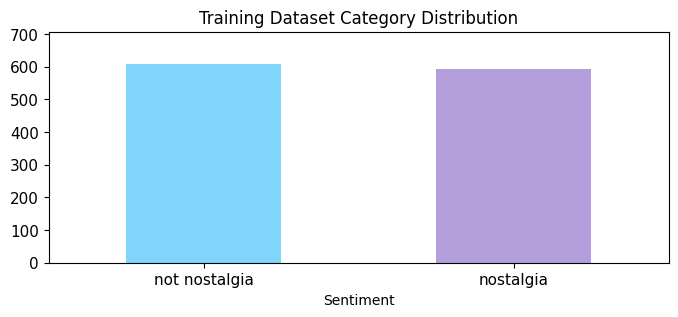

In [79]:
# Calculate sentiment counts in the training dataset
train_sentiment_sample = train_data['sentiment'].value_counts()
y_max = train_sentiment_sample.max() + 100  # Define upper bound for visualization

# Plot the sentiment distribution in the training dataset
train_sentiment_sample.plot(kind='bar', title='Training Dataset Category Distribution',
                            ylim=(0, y_max), color=['#81d4fa', '#b39ddb'],
                            rot=0, fontsize=11, figsize=(8, 3))
plt.xlabel('Sentiment')


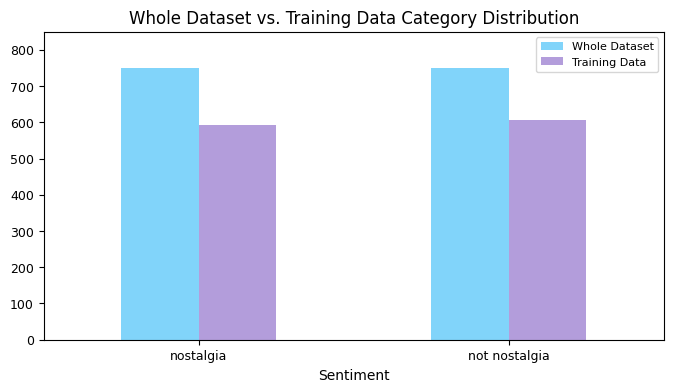

In [94]:
# Calculate value counts for sentiments in the entire dataset and training data
whole_counts = X['sentiment'].value_counts()
train_counts = train_data['sentiment'].value_counts()  # Directly calculate from 'train_data'

# Combine counts into a DataFrame for side-by-side comparison
tgt_counts = pd.DataFrame({'Whole Dataset': whole_counts, 'Training Data': train_counts})

# Define y-axis upper bound for visualization
y_max = tgt_counts.max().max() + 100

# Plot the side-by-side bar chart with pastel colors
tgt_counts.plot(kind='bar',
                         title='Whole Dataset vs. Training Data Category Distribution',
                         ylim=(0, y_max),
                         rot=0, fontsize=9, figsize=(8, 4),
                         color=['#81d4fa', '#b39ddb'], width=0.5)

plt.xlabel('Sentiment')
plt.legend(fontsize=8)

#Feature Creation

In [93]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [96]:
X['unigrams'] = X['comment'].apply(lambda x: dmh.tokenize_text(x))
X[0:4]["unigrams"]

0    [This, beautiful, song, brings, back, memories...
1    [I, listen, to, this, and, think, oh, that, wa...
2    [UNBELIEVABLE, PERFORMANCE, ., NEVER, AGAIN, Y...
3    [Nice, song, of, the, seventies, ., This, is, ...
Name: unigrams, dtype: object

In [113]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.comment) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 3300)	1
  (0, 410)	1
  (0, 3044)	2
  (0, 543)	1
  (0, 358)	2
  (0, 2142)	1
  (0, 2341)	1
  (0, 2254)	1
  (0, 1308)	1
  (0, 3486)	1
  (0, 3581)	1
  (0, 3082)	1
  (0, 3422)	1
  (0, 3589)	1
  (0, 1733)	2
  (0, 1389)	1
  (0, 3556)	1
  (0, 401)	1
  (0, 1314)	1
  (0, 43)	1
  (0, 1804)	2
  (0, 3570)	1
  (0, 428)	1
  (0, 2499)	1
  (0, 236)	1
  (0, 233)	1
  (0, 3284)	1
  (0, 3328)	2
  (0, 1180)	1
  (0, 1606)	1
  (0, 1464)	1
  (0, 3336)	1
  (0, 3709)	1
  (0, 2358)	1
  (0, 2215)	1
  (0, 1512)	2
  (0, 3534)	1


In [114]:
analyze = count_vect.build_analyzer()
analyze(X.comment[0])

['this',
 'beautiful',
 'song',
 'brings',
 'back',
 'memories',
 'of',
 'my',
 'first',
 'vacation',
 'we',
 'spent',
 'two',
 'weeks',
 'in',
 'ft',
 'walton',
 'beach',
 'fl',
 'in',
 '1973',
 'it',
 'was',
 'being',
 'played',
 'almost',
 'all',
 'the',
 'time',
 'every',
 'time',
 'hear',
 'it',
 'go',
 'back',
 'to',
 'yesterday',
 'once',
 'more',
 'great',
 'song',
 'great',
 'voice']

In [115]:
X_counts.shape

(1500, 3730)

In [116]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [117]:
X_counts.shape

(1500, 3730)

In [118]:
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

#Heatmap

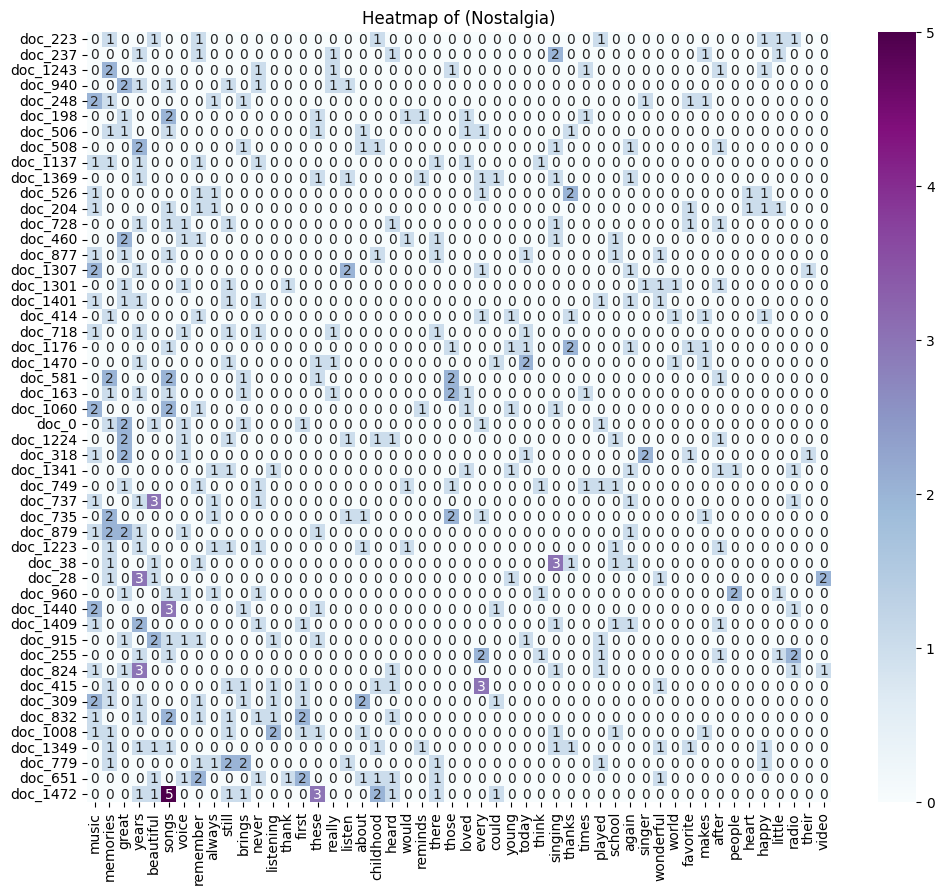

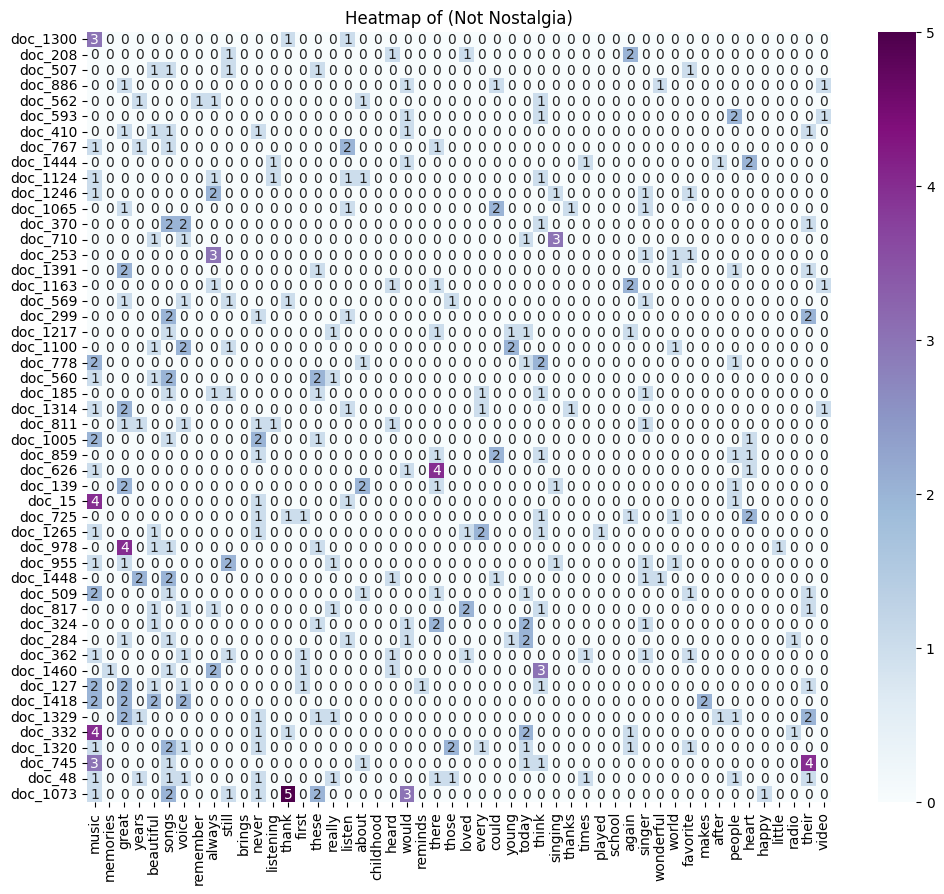

In [135]:
import seaborn as sns
# Set parameters for visualization
n_top_terms = 50
n_docs = 50

nostalgia_data = X[X['sentiment'] == 'nostalgia']
not_nostalgia_data = X[X['sentiment'] == 'not nostalgia']

# Combine both subsets to ensure a consistent vocabulary
combined_data = pd.concat([nostalgia_data, not_nostalgia_data])

# Initialize CountVectorizer and fit on combined data
count_vect = CountVectorizer()
X_counts_combined = count_vect.fit_transform(combined_data['comment'])

# Get feature names and compute term frequencies for combined data
feature_names = count_vect.get_feature_names_out()
term_frequencies = np.asarray(X_counts_combined.sum(axis=0)).flatten()

# Filter terms with fewer than 5 characters
filtered_indices = [i for i, term in enumerate(feature_names) if len(term) >= 5]
filtered_term_frequencies = term_frequencies[filtered_indices]

# Identify top term indices and corresponding feature names
top_n_term_indices = np.argsort(filtered_term_frequencies)[-n_top_terms:][::-1]
top_terms = [feature_names[filtered_indices[i]] for i in top_n_term_indices]

# Separate counts for each subset and proceed with visualization
for data, title in zip([nostalgia_data, not_nostalgia_data], ["Nostalgia", "Not Nostalgia"]):
    # Vectorize the subset data using the fitted vectorizer
    X_counts = count_vect.transform(data['comment'])

    # Subset to the selected top terms and documents
    X_top_terms = X_counts[:, filtered_indices][:, top_n_term_indices].toarray()
    doc_frequencies = X_top_terms.sum(axis=1)
    top_doc_indices = np.argsort(doc_frequencies)[-n_docs:]
    X_top_terms_sampled = X_top_terms[top_doc_indices, :]

    # Set labels for heatmap rows and columns
    plot_y = ["doc_" + str(data.index[i]) for i in top_doc_indices]
    df_heatmap = pd.DataFrame(X_top_terms_sampled, columns=top_terms, index=plot_y)

    # Plot the heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(df_heatmap, cmap="BuPu", vmin=0, vmax=np.max(X_top_terms_sampled), annot=True)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.title(f'Heatmap of ({title})')


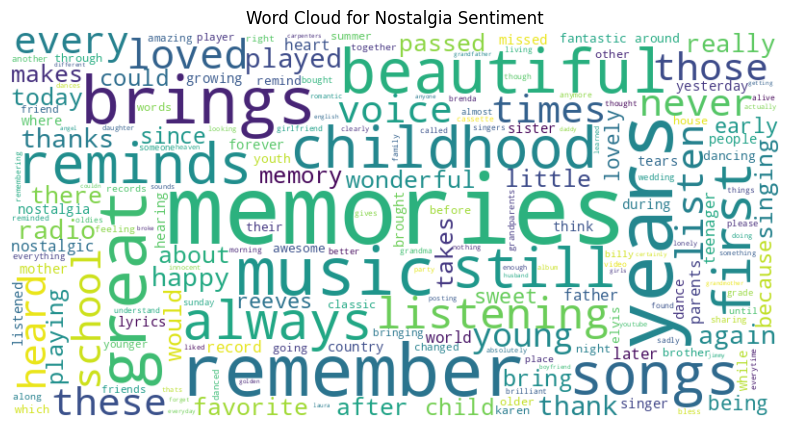

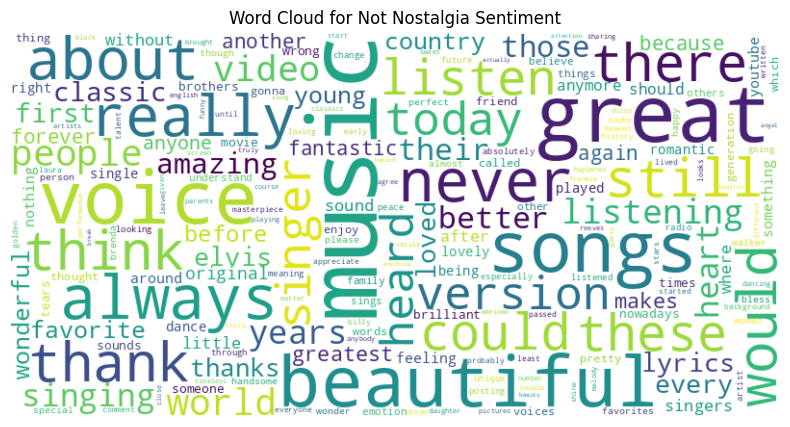

In [136]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

# Initialize CountVectorizer without stop words filtering
count_vect = CountVectorizer()

# Fit the vectorizer on the entire dataset to ensure a consistent vocabulary
X_counts = count_vect.fit_transform(X['comment'])
terms = count_vect.get_feature_names_out()

# Loop over each sentiment to generate word clouds
for sentiment, title in [("nostalgia", "Nostalgia"), ("not nostalgia", "Not Nostalgia")]:
    # Filter comments by sentiment
    subset_data = X[X['sentiment'] == sentiment]
    subset_counts = count_vect.transform(subset_data['comment']).sum(axis=0).A1

    # Filter terms to only include those with at least 5 characters
    term_freq_dict = {terms[i]: subset_counts[i] for i in range(len(terms)) if len(terms[i]) >= 5}

    # Generate and display word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          colormap='viridis', max_font_size=100, relative_scaling=0.5)
    wordcloud.generate_from_frequencies(term_freq_dict)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {title} Sentiment')

#Attribute Transformation / Aggregation

In [137]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [138]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [139]:
term_frequencies[0]

1

In [146]:
import plotly.express as px
# Get the term frequencies and terms
term_frequencies = np.asarray(X_counts.sum(axis=0)).flatten()
terms = count_vect.get_feature_names_out()

# Define frequency threshold and minimum length of terms
frequency_threshold = 10
min_length = 5

# Filter terms based on frequency and length
filtered_indices = [
    i for i, term in enumerate(terms)
    if term_frequencies[i] >= frequency_threshold and len(term) >= min_length
]

# Limit to top N terms that pass the filters
top_n_terms = 100
top_filtered_indices = filtered_indices[:top_n_terms]

# Get the filtered terms and frequencies
filtered_terms = [terms[i] for i in top_filtered_indices]
filtered_frequencies = [term_frequencies[i] for i in top_filtered_indices]

# Create DataFrame and plot
terms_df = pd.DataFrame({'Term': filtered_terms, 'Frequency': filtered_frequencies})

fig = px.bar(terms_df, x='Term', y='Frequency',
             title=f'Term Frequencies (Top {top_n_terms} Terms with Frequency Threshold, Min Length {min_length})',
             color=top_filtered_indices,
             color_discrete_sequence=px.colors.qualitative.Plotly)
fig.update_layout(xaxis_tickfont=dict(size=10),
                  yaxis_tickfont=dict(size=10),xaxis_tickangle=-90, width=2200, height=800)

In [150]:
import plotly.express as px

# Get the term frequencies and terms
term_frequencies = np.asarray(X_counts.sum(axis=0)).flatten()
terms = count_vect.get_feature_names_out()

# Define frequency threshold and minimum length of terms
frequency_threshold = 10
min_length = 5

# Filter terms based on frequency and length
filtered_indices = [
    i for i, term in enumerate(terms)
    if term_frequencies[i] >= frequency_threshold and len(term) >= min_length
]

# Get the filtered terms and frequencies
filtered_terms = [terms[i] for i in filtered_indices]
filtered_frequencies = [term_frequencies[i] for i in filtered_indices]

# Sort the terms and frequencies in descending order of frequency
sorted_indices = np.argsort(filtered_frequencies)[::-1]
sorted_terms = [filtered_terms[i] for i in sorted_indices]
sorted_frequencies = [filtered_frequencies[i] for i in sorted_indices]

# Limit to top N terms that pass the filters
top_n_terms = 100
top_terms = sorted_terms[:top_n_terms]
top_frequencies = sorted_frequencies[:top_n_terms]

# Create DataFrame and plot
terms_df = pd.DataFrame({'Term': top_terms, 'Frequency': top_frequencies})

fig = px.bar(terms_df, x='Term', y='Frequency',
             title=f'Term Frequencies (Top {top_n_terms} Terms with Frequency Threshold {frequency_threshold}, Min Length {min_length}) - Long Tail',
             color=top_terms,
             color_discrete_sequence=px.colors.qualitative.Plotly)
fig.update_layout(xaxis_tickfont=dict(size=10),
                  yaxis_tickfont=dict(size=10),
                  xaxis_tickangle=-90, width=2200, height=800)
fig.show()

In [151]:
# Get the term frequencies and terms
term_frequencies = np.asarray(X_counts.sum(axis=0)).flatten()
terms = count_vect.get_feature_names_out()

# Define frequency threshold and minimum length of terms
frequency_threshold = 10
min_length = 5

# Filter terms based on frequency and length
filtered_indices = [
    i for i, term in enumerate(terms)
    if term_frequencies[i] >= frequency_threshold and len(term) >= min_length
]

# Limit to top N terms that pass the filters
top_n_terms = 100
top_filtered_indices = filtered_indices[:top_n_terms]

# Get the filtered terms and frequencies
filtered_terms = [terms[i] for i in top_filtered_indices]
filtered_frequencies = [term_frequencies[i] for i in top_filtered_indices]

# Apply log transformation to frequencies
log_frequencies = np.log1p(filtered_frequencies)

# Create DataFrame and plot
terms_df = pd.DataFrame({'Term': filtered_terms, 'Log Frequency': log_frequencies})

fig = px.bar(terms_df, x='Term', y='Log Frequency',
             title=f'Log-Transformed Term Frequencies (Top {top_n_terms} Terms with Frequency Threshold {frequency_threshold}, Min Length {min_length})',
             color=filtered_terms,
             color_discrete_sequence=px.colors.qualitative.Plotly)
fig.update_layout(xaxis_tickfont=dict(size=10),
                  yaxis_tickfont=dict(size=10),
                  xaxis_tickangle=-90, width=2200, height=800)
fig.show()

#Frequent Pattern

In [177]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Get unique sentiment categories
categories = X['sentiment_label'].unique()
category_dfs = {category: X[X['sentiment_label'] == category].copy() for category in categories}

# Function to create term-document matrix for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()
    X_counts = count_vect.fit_transform(df['comment'])
    words = count_vect.get_feature_names_out()
    return pd.DataFrame(X_counts.toarray(), columns=words)

# Create term-document matrices for each sentiment category
#filt_term_document_dfs = {category: create_term_document_df(category_dfs[category]) for category in categories}
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

# Function to filter top 5% and bottom 1% words
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.01, bottom_percent=0.01):
    word_sums = term_document_df.sum(axis=0).sort_values()
    total_words = len(word_sums)
    top_n, bottom_n = int(top_percent * total_words), int(bottom_percent * total_words)
    words_to_remove = pd.concat([word_sums.head(bottom_n), word_sums.tail(top_n)]).index
    return term_document_df.drop(columns=words_to_remove)

# Apply filtering for each category
filt_test_term_document_dfs = {category: filter_top_bottom_words_by_sum(df) for category, df in filt_term_document_dfs.items()}


Database size (total no of transactions) : 750
Number of items : 2251
Minimum Transaction Size : 1
Average Transaction Size : 14.753333333333334
Maximum Transaction Size : 56
Standard Deviation Transaction Size : 10.5504102079282
Variance in Transaction Sizes : 111.45976858032932
Sparsity : 0.9934458759070043


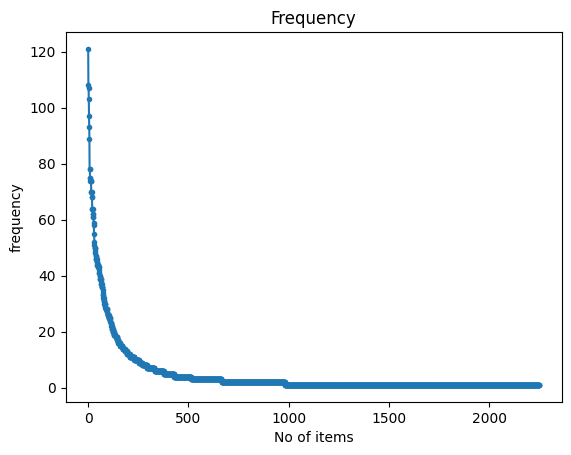

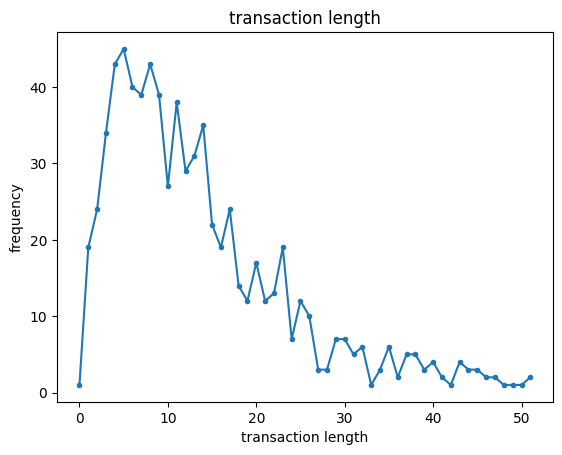

In [178]:
from PAMI.extras.convert.DF2DB import DF2DB

for category, df in filt_test_term_document_dfs.items():
    obj = DF2DB(df)
    obj.convert2TransactionalDatabase(f'td_freq_db_{category}.csv', '>=', 1)
from PAMI.extras.dbStats import TransactionalDatabase as tds

csv_url = "td_freq_db_1.csv"  # Adjust for each category as needed
obj = tds.TransactionalDatabase(csv_url)
obj.run()
obj.printStats()
obj.plotGraphs()


In [191]:
import pandas as pd
from PAMI.frequentPattern.topk import FAE as alg
k=500
fae = alg.FAE(iFile='td_freq_db_0.csv', k=k)
fae.mine()
print('Top-K Runtime =', fae.getRuntime())
frequentPatternsDF_N = fae.getPatternsAsDataFrame()


 TopK frequent patterns were successfully generated using FAE algorithm.
Top-K Runtime = 0.37099528312683105


In [192]:
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg
minSup=3
mfp = alg.MaxFPGrowth(iFile='td_freq_db_0.csv', minSup=minSup)
mfp.mine()
print('MaxFPGrowth Runtime =', mfp.getRuntime())
frequentPatternsDF_NN = mfp.getPatternsAsDataFrame()

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
MaxFPGrowth Runtime = 0.4193136692047119


In [195]:
#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_N, frequentPatternsDF_NN]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

                 Patterns  Support
0                     not       87
1                     can       85
2                      on       84
3                      me       83
4                   voice       80
...                   ...      ...
1922            heard ve         3
1923              had ve         3
1924      think first ve         3
1925            never ve         3
4064  on voice beautiful         3

[4065 rows x 2 columns]
Number of patterns discarded: 0


In [196]:
# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['comment'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  045  07  10  100  10m  11  11th  12  ...  she go   can as go   \
0      0    0    0   0   0    0    0   0     0   0  ...        0           0   
1      0    0    0   0   0    0    0   0     0   0  ...        0           0   
2      0    0    0   0   0    0    0   0     0   0  ...        0           0   
3      0    0    0   0   0    0    0   0     0   0  ...        0           0   
4      0    0    0   0   0    0    0   0     0   0  ...        0           0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...      ...         ...   
1495   0    0    0   0   0    0    0   0     0   0  ...        0           0   
1496   0    0    0   0   0    0    0   0     0   0  ...        0           0   
1497   0    0    0   0   0    0    0   0     0   0  ...        0           0   
1498   0    0    0   0   0    0    0   0     0   0  ...        0           0   
1499   0    0    0   0   0    0    0   0     0   0  ...        0           0   

      be will go   can if go   version ve   heard ve   had ve   \
0               0           0            0          0        0   
1               0           0            0          0        0   
2               0           0            0          0        0   
3               0           0            0          0        0   
4               0           0            0          0        0   
...           ...         ...          ...        ...      ...   
1495            0           0            0          0        0   
1496            0           0            0          0        0   
1497            0           0            0          0        0   
1498            0           0            0          0        0   
1499            0           0            0          0        0   

      think first ve   never ve   on voice beautiful   
0                   0          0                    0  
1                   0          0                    0  
2                   0          0                    0  
3                   0          0                    0  
4                   0          0                    0  
...               ...        ...                  ...  
1495                0          0                    0  
1496                0          0                    0  
1497                0          0                    0  
1498                0          0                    0  
1499                0          0                    0  

[1500 rows x 7795 columns]

### 5.5 Dimensionality Reduction

In [198]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

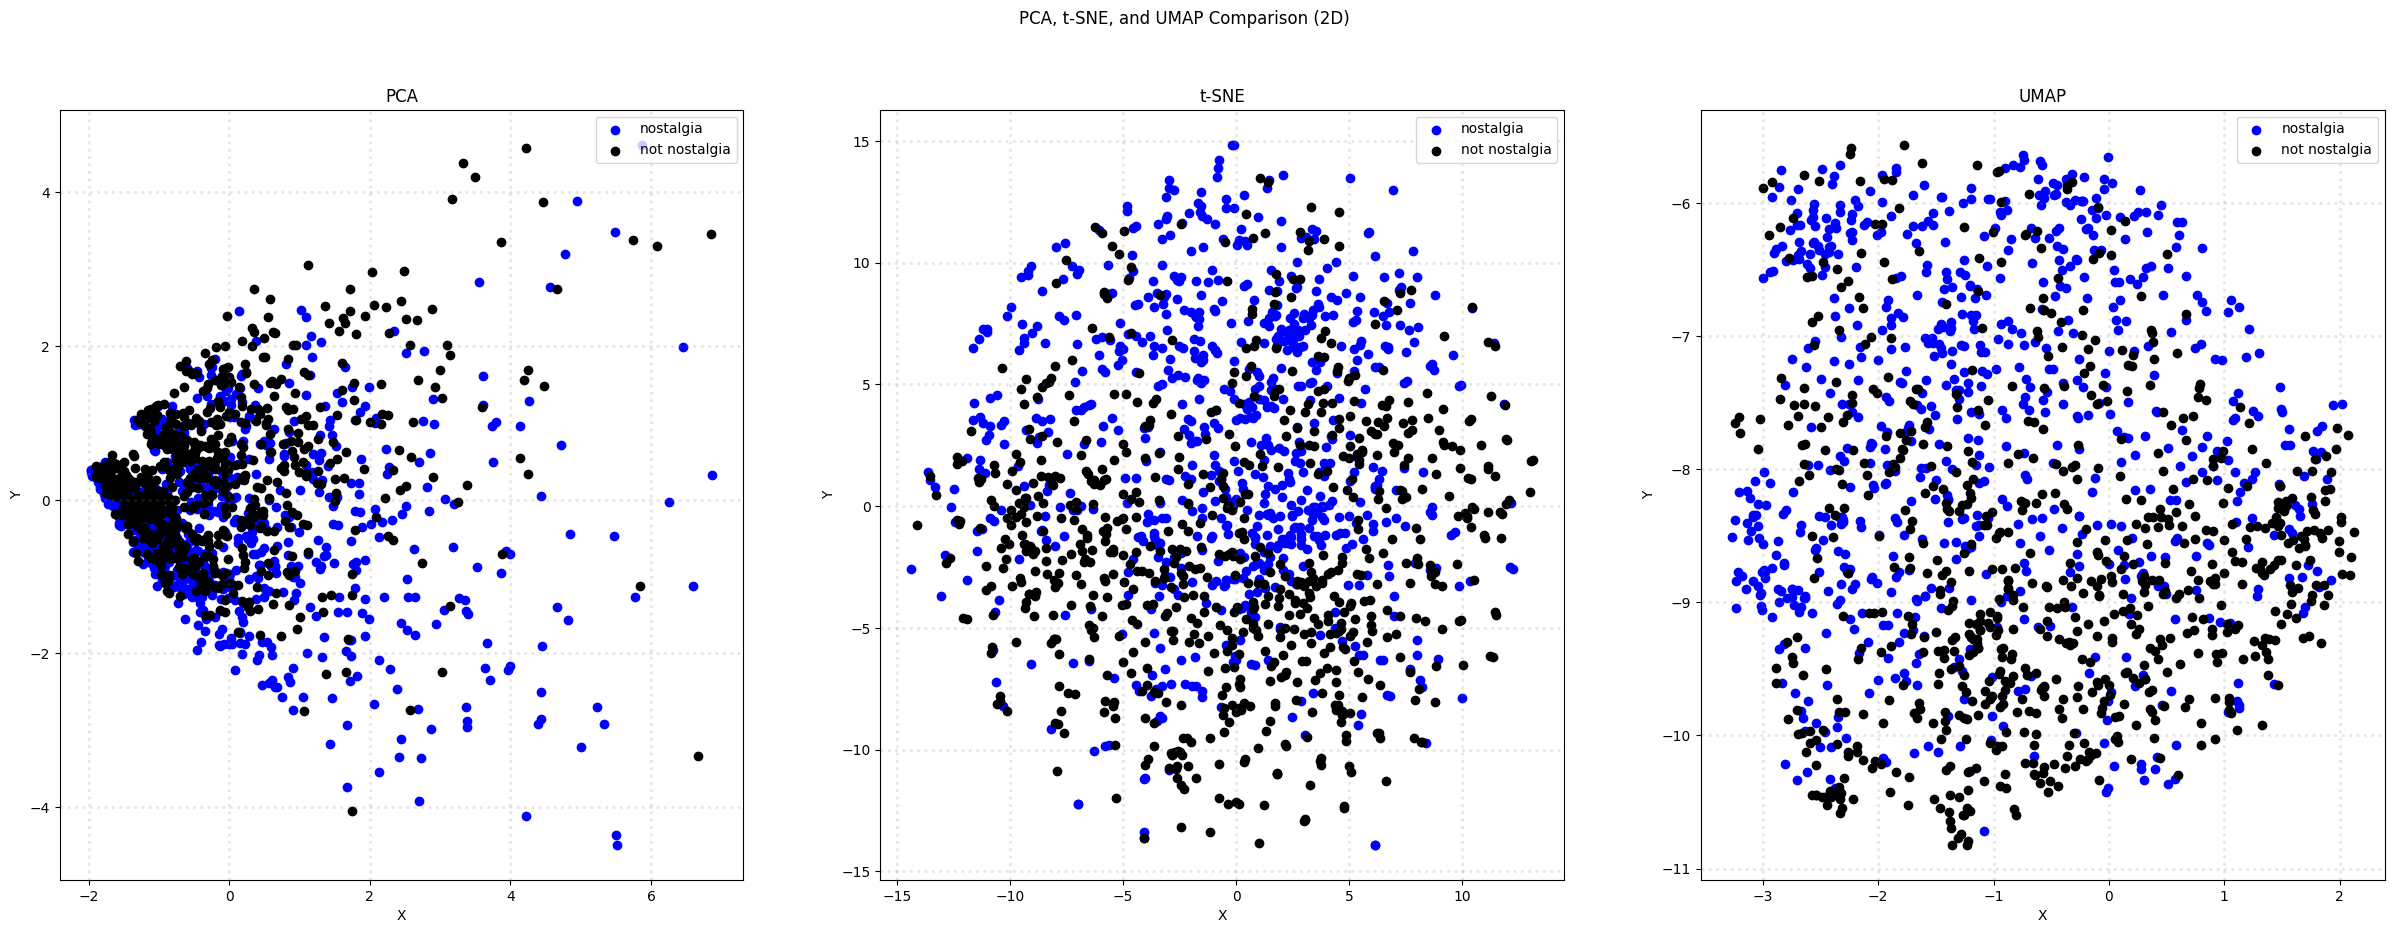

In [209]:
# Colors and categories for plotting
col = [ 'blue', 'black']
categories = X['sentiment'].unique()

# Create 2D subplots for PCA, t-SNE, and UMAP
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
fig.suptitle('PCA, t-SNE, and UMAP Comparison (2D)')

# Define a function to create a 2D scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for each dimensionality reduction method
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [207]:
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

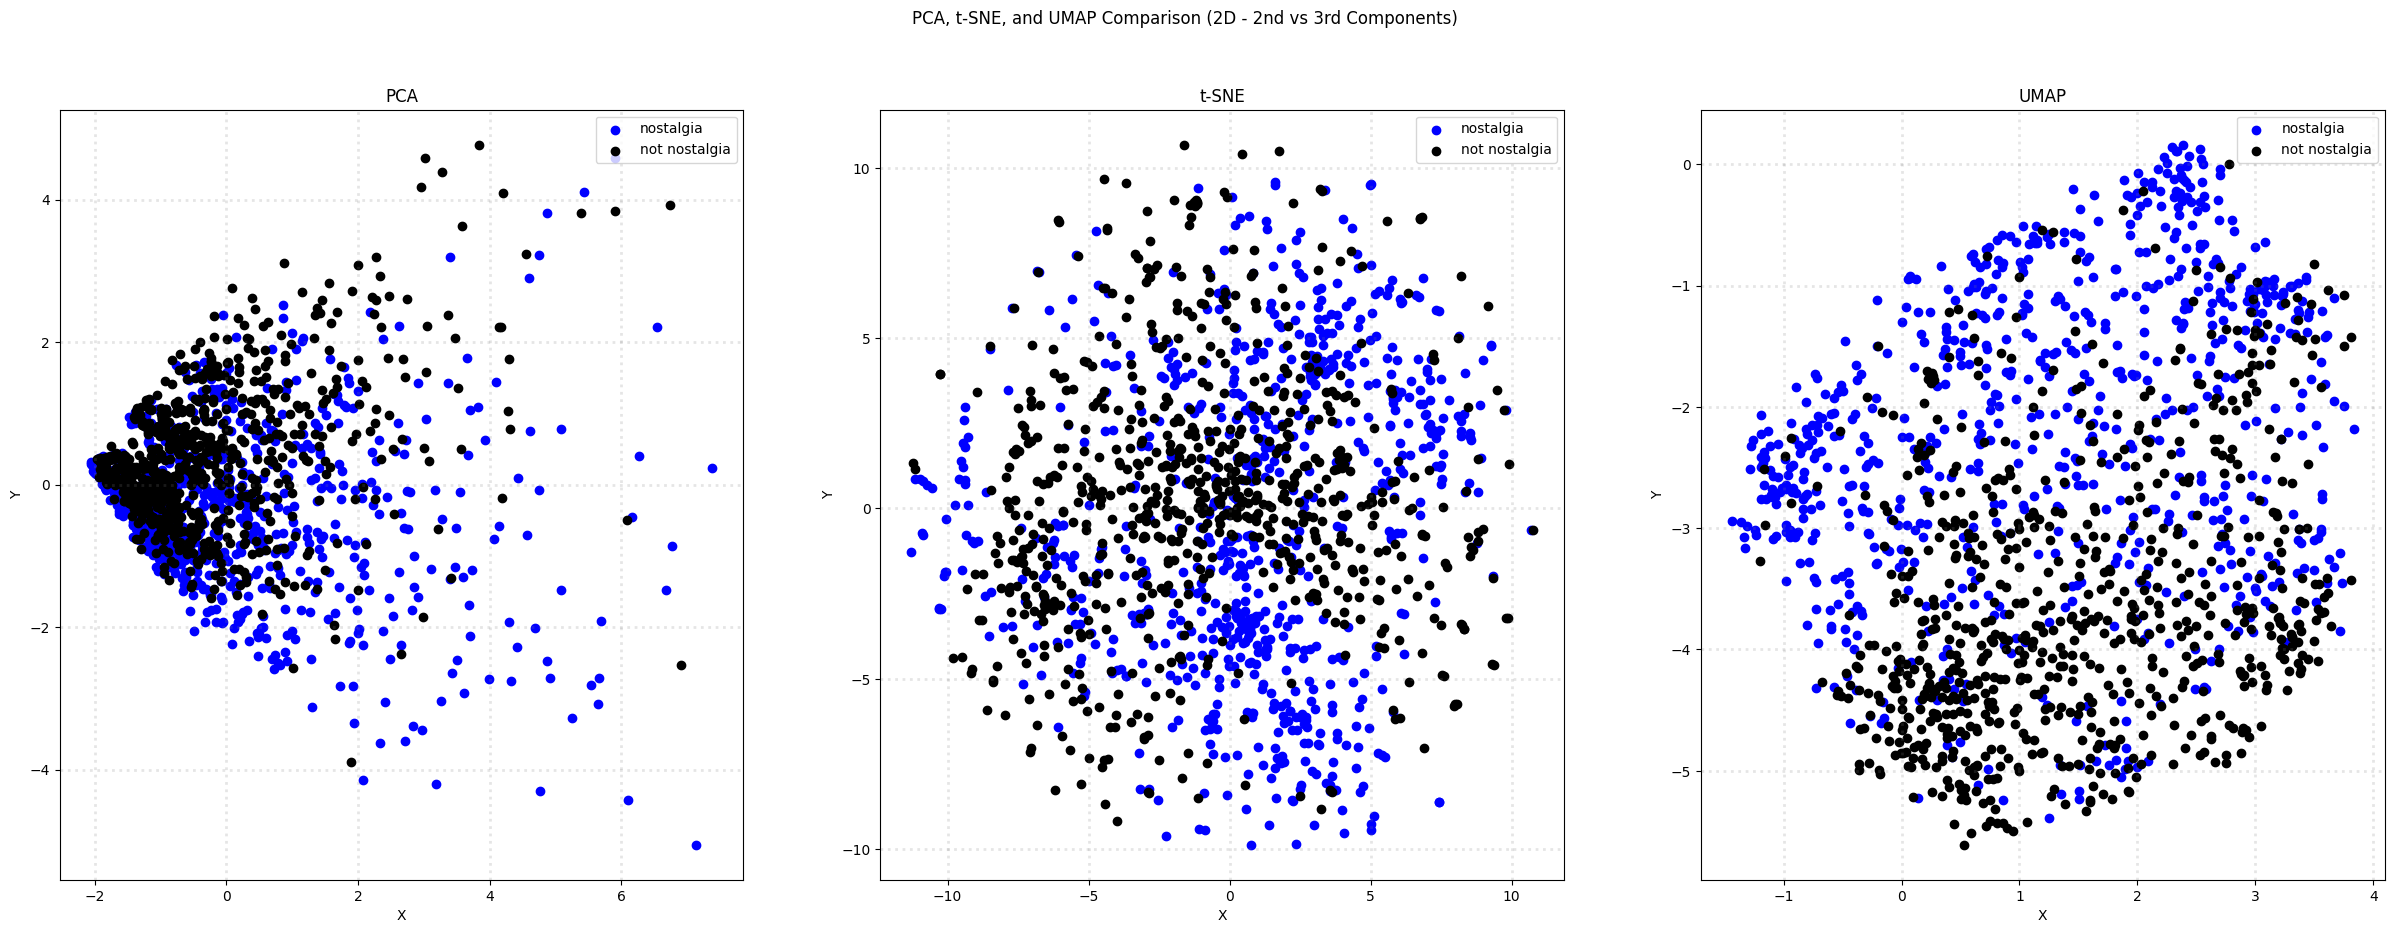

In [210]:
# Colors and categories for plotting
col = ['blue', 'black']
categories = X['sentiment'].unique()

# Create 2D subplots for PCA, t-SNE, and UMAP using the 2nd and 3rd components
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
fig.suptitle('PCA, t-SNE, and UMAP Comparison (2D - 2nd vs 3rd Components)')

# Define a function to create a 2D scatter plot for the 2nd vs. 3rd components
def plot_scatter_alternate(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]  # Use 2nd component for x-axis
        ys = X_reduced[X['sentiment'] == category].T[1]  # Use 3rd component for y-axis
        ax.scatter(xs, ys, c=c, marker='o', label=category)

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for each dimensionality reduction method with the alternate components
plot_scatter_alternate(axes[0], X_pca_aug, 'PCA')
plot_scatter_alternate(axes[1], X_tsne_aug, 't-SNE')
plot_scatter_alternate(axes[2], X_umap_aug, 'UMAP')

plt.show()


In [211]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap

# Apply 3D dimensionality reduction
X_pca_aug_3d = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug_3d = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug_3d = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

# Define colors and categories for plotting
colors = ['blue', 'black']
categories = X['sentiment'].unique()

# 3D scatter plot function
def scatter_3d_plot(ax, X_reduced, title, angle):
    for color, category in zip(colors, categories):
        mask = X['sentiment'] == category
        xs, ys, zs = X_reduced[mask, 0], X_reduced[mask, 1], X_reduced[mask, 2]
        ax.scatter(xs, ys, zs, c=color, label=category, marker='o')

    ax.view_init(30, angle)
    ax.set_title(f"{title} (Angle {angle}°)")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)

# Dictionary of reductions for easier plotting
X_reductions = {
    "PCA": X_pca_aug_3d,
    "t-SNE": X_tsne_aug_3d,
    "UMAP": X_umap_aug_3d
}

# Plot each reduction with specified angles
angles = [45, 90, 135]
for angle in angles:
    fig = plt.figure(figsize=(30, 10))
    fig.suptitle(f'PCA, t-SNE, and UMAP Comparison (Angle {angle}°)')

    for i, (title, X_reduced) in enumerate(X_reductions.items(), 1):
        ax = fig.add_subplot(1, 3, i, projection='3d')
        scatter_3d_plot(ax, X_reduced, title, angle)

    plt.show()

Output hidden; open in https://colab.research.google.com to view.

### 5.6 Discretization and Binarization

In [213]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.sentiment)
X['bin_category'] = mlb.transform(X['sentiment']).tolist()
X[0:9]

sentiment                                            comment  \
0      nostalgia  This beautiful song brings back memories of my...   
1  not nostalgia  I listen to this and think oh that was the gre...   
2  not nostalgia  UNBELIEVABLE PERFORMANCE. NEVER AGAIN YOU WILL...   
3  not nostalgia  Nice song of the seventies.  This is the sort ...   
4      nostalgia  what a band great  sound and good times back t...   
5  not nostalgia  What a beauty   How beautiful is this message ...   
6  not nostalgia  I usually prepare the rocker sound of the 60's...   
7  not nostalgia  Thank you for posting, this has always been on...   
8  not nostalgia  This is song is so powerful and meaningful. I ...   

   sentiment_label                                           unigrams  \
0                1  [This, beautiful, song, brings, back, memories...   
1                0  [I, listen, to, this, and, think, oh, that, wa...   
2                0  [UNBELIEVABLE, PERFORMANCE, ., NEVER, AGAIN, Y...   
3                0  [Nice, song, of, the, seventies, ., This, is, ...   
4                1  [what, a, band, great, sound, and, good, times...   
5                0  [What, a, beauty, How, beautiful, is, this, me...   
6                0  [I, usually, prepare, the, rocker, sound, of, ...   
7                0  [Thank, you, for, posting, ,, this, has, alway...   
8                0  [This, is, song, is, so, powerful, and, meanin...   

                                      tokenized_text bin_category  
0  {being, weeks, song, FL,, in, Every, it, time,...          [0]  
1  {then, I, and, the, oh, another, this, listen,...          [1]  
2  {AGAIN, HEAR, WILL, NEVER, THIS, YOU, MELODY.,...          [1]  
3  {being, do, nowadays, this, has, song, a, few,...          [1]  
4  {then, band, what, sound, and, good, great, ti...          [0]  
5  {never, this, What, youngsters, much, a, messa...          [1]  
6  {my, heart, 60's, I, the, sound, but, -, this,...          [1]  
7  {favorites., this, has, been, make, a, them, l...          [1]  
8  {you'll, people, And, this, meaningful., song,...          [1]

# 6. Data Exploration

In [214]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [215]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['Brings back so many memories. I remember my sister buying this for my birthday. my first record.']
['Remind me my childhood....']
["I remember hearing this song as a 10 year old who had just found out my 16 year old crush got a girlfriend, and really feeling the lyrics were written for me!! Listening to it now, 53 years later, that same heartache came back. That's the sign of TRUE music!!! Miss those days."]


In [216]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [222]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2[0][0]})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3[0][0]})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3[0][0]})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1[0][0]})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2[0][0]})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3[0][0]})

Cosine Similarity using count bw 1 and 2: 0.319801
Cosine Similarity using count bw 1 and 3: 0.195962
Cosine Similarity using count bw 2 and 3: 0.131306
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


#Data Classification

In [226]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Generate Word Frequency Features
count_vect = CountVectorizer()
X_count = count_vect.fit_transform(X['comment'])

# Generate TF-IDF Features
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(X['comment'])

# Split data for Word Frequency Model
X_train_count, X_test_count, y_train, y_test = train_test_split(
    X_count, X['sentiment'], test_size=0.3, random_state=42
)

# Split data for TF-IDF Model
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(
    X_tfidf, X['sentiment'], test_size=0.3, random_state=42
)

# Train Naive Bayes with Word Frequency Features
nb_count = MultinomialNB()
nb_count.fit(X_train_count, y_train)
y_pred_count = nb_count.predict(X_test_count)

# Train Naive Bayes with TF-IDF Features (using ComplementNB)
nb_tfidf = ComplementNB()
nb_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

# Evaluate both models
print("=== Word Frequency Model ===")
print("Accuracy:", accuracy_score(y_test, y_pred_count))
print("\nClassification Report:\n", classification_report(y_test, y_pred_count))

print("\n=== TF-IDF Model ===")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tfidf))


=== Word Frequency Model ===
Accuracy: 0.8666666666666667

Classification Report:
                precision    recall  f1-score   support

    nostalgia       0.81      0.94      0.87       220
not nostalgia       0.93      0.80      0.86       230

     accuracy                           0.87       450
    macro avg       0.87      0.87      0.87       450
 weighted avg       0.88      0.87      0.87       450


=== TF-IDF Model ===
Accuracy: 0.8577777777777778

Classification Report:
                precision    recall  f1-score   support

    nostalgia       0.80      0.95      0.87       220
not nostalgia       0.94      0.77      0.85       230

     accuracy                           0.86       450
    macro avg       0.87      0.86      0.86       450
 weighted avg       0.87      0.86      0.86       450



Word Frequency Model:

Strengths:

Performs well on balanced datasets.
Captures raw word frequency, which may be more interpretable.

Weaknesses:

Can be sensitive to high-frequency common words.
Favors frequent terms, which can skew predictions.
TF-IDF Model (ComplementNB):

Strengths:

Handles imbalanced datasets better.
Focuses on informative words (ignores overly common words).

Weaknesses:

TF-IDF may discard useful frequent terms.
Requires more preprocessing and computation compared to raw frequency.

#Visualization Tools

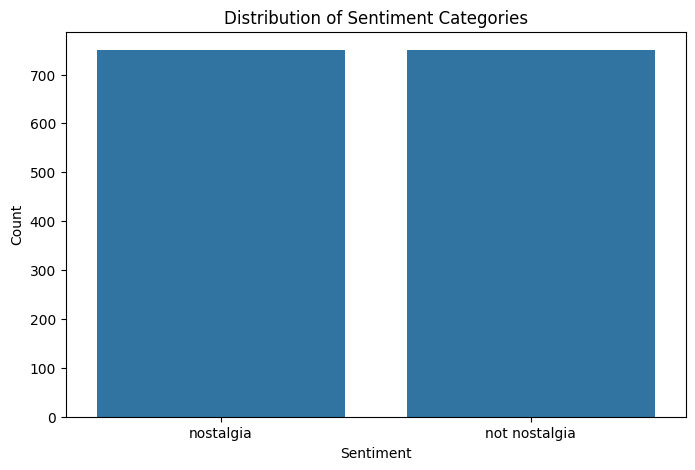

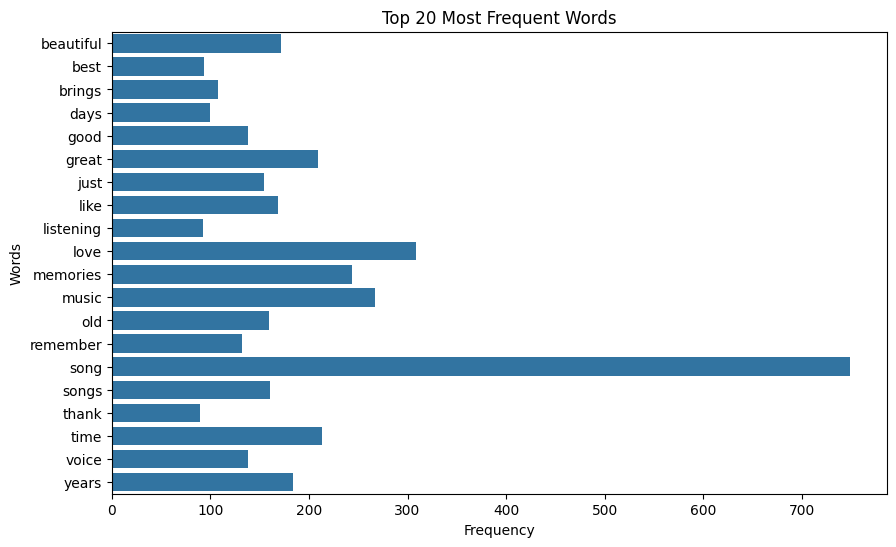

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of sentiment categories
plt.figure(figsize=(8, 5))
sns.countplot(x=X['sentiment'])
plt.title("Distribution of Sentiment Categories")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Visualize the most frequent words in the dataset using word frequency
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer and fit it on the text data
count_vect = CountVectorizer(max_features=20, stop_words='english')
word_counts = count_vect.fit_transform(X['comment'])

# Sum the word counts to get the frequency of each word
word_freq = word_counts.toarray().sum(axis=0)
words = count_vect.get_feature_names_out()

# Create a bar plot for the top 20 most frequent words
plt.figure(figsize=(10, 6))
sns.barplot(x=word_freq, y=words)
plt.title("Top 20 Most Frequent Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

#Part 4

In the lab, several inefficiencies in data preprocessing were identified that could be optimized for better performance and clarity. For example, repeated sorting operations can be made more efficient by caching sorted results, avoiding unnecessary recalculations and speeding up processing time. When selecting features, using Term Frequency-Inverse Document Frequency (TF-IDF) instead of fixed frequency thresholds allows feature selection to adapt to the specific dataset. TF-IDF measures not just raw frequency but also adjusts for the importance of terms across documents, which is especially useful when analyzing nuanced concepts like nostalgia, where word frequency alone may not reflect true significance.

Custom stop word lists tailored to each dataset can also improve preprocessing, as they remove irrelevant terms that don't contribute to sentiment or categorization but are common in the context of that dataset. Additionally, basic text preprocessing steps—such as handling punctuation, performing stemming or lemmatization, and removing excess whitespace—reduce noise and help ensure that words are analyzed consistently. This is crucial as applying uniform text preprocessing across datasets can be challenging but is essential for clarity and consistency in text-based features.

Finally, classification techniques should be carefully chosen and tuned to match the dataset's characteristics. For instance, in sentiment analysis or thematic classification, a naive use of frequency-based methods may not capture the underlying sentiment. Using methods like TF-IDF enriches the model's understanding by capturing term relevance and context, which can be essential for datasets with abstract concepts, like nostalgia. Adapting preprocessing and classification strategies to fit each dataset's unique features not only enhances model accuracy but also improves interpretability and insight.

#Part 5

Comments updated, and fed through LLM to get comments